# **Import Libraries**

In [0]:
#Libraries
import pandas as pd
#from memory_profiler import memory_usage
import os
from glob import glob
import numpy as np
import keras
from keras import models
from keras.optimizers import Adam
from keras_preprocessing.image import ImageDataGenerator
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D, Conv2D, Conv1D
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.layers.advanced_activations import LeakyReLU
from sklearn import metrics 
%matplotlib inline
from keras.layers import Input
from keras.models import Model
from tensorflow.keras import Input, layers
from keras.utils import plot_model
from sklearn.metrics import classification_report
import bottleneck as bn


In [0]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Exploratory Analysis**

In [0]:
import os
os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment')

In [0]:
#Load the balanced dataset with the files that have benn downloaded
balanced = pd.read_csv("balanced.csv", sep = ';')
balanced = balanced.loc[balanced['file_downloaded'] == 1]
balanced.drop('id', axis=1, inplace=True)
balanced['labels'].str.replace(' ','')
balanced

,url,start_time,end_time,labels,file_downloaded,filename
0,--PJHxphWEs,30.0,40.0,"/m/09x0r,/t/dd00088",1,__pjhxphwes.mp3
1,--ZhevVpy1s,50.0,60.0,/m/012xff,1,__zhevvpy1s.mp3
2,--aE2O5G5WE,0.0,10.0,"/m/03fwl,/m/04rlf,/m/09x0r",1,__ae2o5g5we.mp3
4,--aaILOrkII,200.0,210.0,"/m/032s66,/m/073cg4",1,__aailorkii.mp3
5,--cB2ZVjpnA,30.0,40.0,/m/01y3hg,1,__cb2zvjpna.mp3
6,--ekDLDTUXA,30.0,40.0,"/m/015lz1,/m/07pws3f",1,__ekdldtuxa.mp3
7,-0DLPzsiXXE,30.0,40.0,"/m/04rlf,/m/07qwdck",1,_0dlpzsixxe.mp3
8,-0DdlOuIFUI,50.0,60.0,"/m/0130jx,/m/02jz0l,/m/0838f",1,_0ddlouifui.mp3
9,-0FHUc78Gqo,30.0,40.0,"/m/02w4v,/m/04rlf",1,_0fhuc78gqo.mp3
10,-0O3e95y4gE,100.0,110.0,"/m/07r4wb8,/t/dd00125",1,_0o3e95y4ge.mp3


In [0]:
#Create a temporary df with the labels of each file
temp = balanced["labels"].str.split("," , expand = True)

In [0]:
# Replace the ' ' character for further manipulation
temp[0] = temp[0].str.replace(' ','')

In [0]:
# Load the labels with the indexed in a dictionary
labels = pd.read_csv("labels.csv")
labels.drop('index', axis=1, inplace=True)
labels = labels.set_index('mid')['display_name'].to_dict()
labels

{'/m/09x0r': 'Speech',
 '/m/05zppz': 'Male speech, man speaking',
 '/m/02zsn': 'Female speech, woman speaking',
 '/m/0ytgt': 'Child speech, kid speaking',
 '/m/01h8n0': 'Conversation',
 '/m/02qldy': 'Narration, monologue',
 '/m/0261r1': 'Babbling',
 '/m/0brhx': 'Speech synthesizer',
 '/m/07p6fty': 'Shout',
 '/m/07q4ntr': 'Bellow',
 '/m/07rwj3x': 'Whoop',
 '/m/07sr1lc': 'Yell',
 '/m/04gy_2': 'Battle cry',
 '/t/dd00135': 'Children shouting',
 '/m/03qc9zr': 'Screaming',
 '/m/02rtxlg': 'Whispering',
 '/m/01j3sz': 'Laughter',
 '/t/dd00001': 'Baby laughter',
 '/m/07r660_': 'Giggle',
 '/m/07s04w4': 'Snicker',
 '/m/07sq110': 'Belly laugh',
 '/m/07rgt08': 'Chuckle, chortle',
 '/m/0463cq4': 'Crying, sobbing',
 '/t/dd00002': 'Baby cry, infant cry',
 '/m/07qz6j3': 'Whimper',
 '/m/07qw_06': 'Wail, moan',
 '/m/07plz5l': 'Sigh',
 '/m/015lz1': 'Singing',
 '/m/0l14jd': 'Choir',
 '/m/01swy6': 'Yodeling',
 '/m/02bk07': 'Chant',
 '/m/01c194': 'Mantra',
 '/t/dd00003': 'Male singing',
 '/t/dd00004': 'Female

In [0]:
# Replace the indexes with the labels
for i in range(12):
    temp = temp.replace({i: labels})

In [0]:
#Rename the columns
temp.columns = ["Label1", "Label2", "Label3", "Label4", "Label5", "Label6", "Label7", "Label8", "Label9", "Label10", "Label11", "Label12"]

#Create a new column for the total number of labels per file
temp['Number_Labels'] = 0

#Calculate the number of labels of each file
for i in range(0,len(temp)):
    temp.iloc[i, 12] = temp.iloc[i,0:11].count()

temp.head()

,Label1,Label2,Label3,Label4,Label5,Label6,Label7,Label8,Label9,Label10,Label11,Label12,Number_Labels
0,Speech,Gush,None,None,None,None,None,None,None,None,None,None,2
1,Toothbrush,None,None,None,None,None,None,None,None,None,None,None,1
2,Goat,Music,Speech,None,None,None,None,None,None,None,None,None,3
4,"Gunshot, gunfire",Cap gun,None,None,None,None,None,None,None,None,None,None,2
5,"Smoke detector, smoke alarm",None,None,None,None,None,None,None,None,None,None,None,1


In [0]:
# Concatenate the labels for each file
balanced = pd.concat([balanced, temp], axis=1)
balanced.drop('labels', axis=1, inplace=True)
balanced

,url,start_time,end_time,file_downloaded,filename,Label1,Label2,Label3,Label4,Label5,Label6,Label7,Label8,Label9,Label10,Label11,Label12,Number_Labels
0,--PJHxphWEs,30.0,40.0,1,__pjhxphwes.mp3,Speech,Gush,None,None,None,None,None,None,None,None,None,None,2
1,--ZhevVpy1s,50.0,60.0,1,__zhevvpy1s.mp3,Toothbrush,None,None,None,None,None,None,None,None,None,None,None,1
2,--aE2O5G5WE,0.0,10.0,1,__ae2o5g5we.mp3,Goat,Music,Speech,None,None,None,None,None,None,None,None,None,3
4,--aaILOrkII,200.0,210.0,1,__aailorkii.mp3,"Gunshot, gunfire",Cap gun,None,None,None,None,None,None,None,None,None,None,2
5,--cB2ZVjpnA,30.0,40.0,1,__cb2zvjpna.mp3,"Smoke detector, smoke alarm",None,None,None,None,None,None,None,None,None,None,None,1
6,--ekDLDTUXA,30.0,40.0,1,__ekdldtuxa.mp3,Singing,Bang,None,None,None,None,None,None,None,None,None,None,2
7,-0DLPzsiXXE,30.0,40.0,1,_0dlpzsixxe.mp3,Music,Ping,None,None,None,None,None,None,None,None,None,None,2
8,-0DdlOuIFUI,50.0,60.0,1,_0ddlouifui.mp3,Sink (filling or washing),"Water tap, faucet",Water,None,None,None,None,None,None,None,None,None,3
9,-0FHUc78Gqo,30.0,40.0,1,_0fhuc78gqo.mp3,Folk music,Music,None,None,None,None,None,None,None,None,None,None,2
10,-0O3e95y4gE,100.0,110.0,1,_0o3e95y4ge.mp3,Knock,"Inside, small room",None,None,None,None,None,None,None,None,None,None,2


In [0]:
# df with the columns that contain label
df=balanced.filter(regex="^Label")

In [0]:
# Count the labels
LabelsCnt=pd.Series(df.squeeze().values.ravel()).value_counts()

In [0]:
# Short description of the labels
LabelsCnt.describe

<bound method NDFrame.describe of Music                                   5553
Speech                                  5095
Vehicle                                  814
Animal                                   673
Inside, small room                       669
Musical instrument                       507
Singing                                  464
Domestic animals, pets                   385
Guitar                                   335
Plucked string instrument                291
Car                                      278
Dog                                      260
Percussion                               248
Water                                    243
Wind instrument, woodwind instrument     233
Outside, urban or manmade                230
Outside, rural or natural                229
Boat, Water vehicle                      228
Brass instrument                         211
Siren                                    182
Engine                                   179
Train                

Same for evaluation


In [0]:
#Load the evaluation dataset with the files that have benn downloaded
evaluation = pd.read_csv("evaluation.csv", sep = ';')
evaluation = evaluation.loc[evaluation['file_downloaded'] == 1]
evaluation.drop('id', axis=1, inplace=True)
evaluation['labels'].str.replace(' ','')
evaluation

#Create a temporary df with the labels of each file
temp = evaluation["labels"].str.split("," , expand = True)

# Replace the ' ' character for further manipulation
temp[0] = temp[0].str.replace(' ','')

for i in range(12):
    temp = temp.replace({i: labels})

#Rename the columns
temp.columns = ["Label1", "Label2", "Label3", "Label4", "Label5", "Label6", "Label7", "Label8", "Label9", "Label10", "Label11"]

#Create a new column for the total number of labels per file
temp['Number_Labels'] = 0

#Calculate the number of labels of each file
for i in range(0,len(temp)):
    temp.iloc[i, 11] = temp.iloc[i,0:11].count()

temp.head()

# Concatenate the labels for each file
evaluation = pd.concat([evaluation, temp], axis=1)
evaluation.drop('labels', axis=1, inplace=True)
evaluation

df=evaluation.filter(regex="^Label")

LabelsCnt=pd.Series(df.squeeze().values.ravel()).value_counts()

LabelsCnt.describe

<bound method NDFrame.describe of Music                                      5113
Speech                                     4834
Vehicle                                     738
Animal                                      638
Inside, small room                          531
Musical instrument                          392
Singing                                     326
Domestic animals, pets                      318
Guitar                                      289
Car                                         266
Water                                       263
Wind instrument, woodwind instrument        243
Plucked string instrument                   242
Percussion                                  237
Boat, Water vehicle                         231
Dog                                         208
Bird                                        203
Fowl                                        200
Outside, urban or manmade                   198
Siren                                       192
Brass 

# **Preparation of Train Dataset**

In [0]:
os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment/balanced/train')

In [0]:
# Create a column with the labels named
balanced['labels'] = balanced[balanced.columns[5:-1]].apply(lambda x: '|'.join(x.dropna().astype(str)), axis=1)

In [0]:
# Create the train dataset
train_data = balanced[['filename', 'labels']]
train_labels = train_data['labels'].str.get_dummies(sep='|')
train_data

,filename,labels
0,__pjhxphwes.mp3,Speech|Gush
1,__zhevvpy1s.mp3,Toothbrush
2,__ae2o5g5we.mp3,Goat|Music|Speech
4,__aailorkii.mp3,"Gunshot, gunfire|Cap gun"
5,__cb2zvjpna.mp3,"Smoke detector, smoke alarm"
6,__ekdldtuxa.mp3,Singing|Bang
7,_0dlpzsixxe.mp3,Music|Ping
8,_0ddlouifui.mp3,"Sink (filling or washing)|Water tap, faucet|Water"
9,_0fhuc78gqo.mp3,Folk music|Music
10,_0o3e95y4ge.mp3,"Knock|Inside, small room"


In [0]:
train_labels

,A capella,"Accelerating, revving, vroom",Accordion,Acoustic guitar,Afrobeat,Air brake,Air conditioning,"Air horn, truck horn",Aircraft,Aircraft engine,...,Wind noise (microphone),Wood,Wood block,Writing,Yell,Yip,Yodeling,Zing,Zipper (clothing),Zither
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# Reset the index
train_data = train_data.reset_index(drop=True)
train_labels = train_labels.reset_index(drop=True)

In [0]:
os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment/balanced/train')
def parser(row):
   # function to load files and extract features
   file_name = row.filename

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file_name)
      return None, None
 
   feature = mfccs
   label = row.labels
 
   return [feature]

temp = train_data.apply(parser, axis=1)


In [0]:
# Drop the rows with the error and reset the index
train_labels = train_labels.drop([101,112,332,345,505,557,560,564,575,708,715,730,825,1066,1077,1166,1179,1200,1206,3010]).reset_index(drop=True)
train_data = train_data.drop([101,112,332,345,505,557,560,564,575,708,715,730,825,1066,1077,1166,1179,1200,1206,3010]).reset_index(drop=True)


In [0]:
train_labels.shape

(19918, 527)

In [0]:
# Drop the arrays with the none values
temp = np.array(list(filter(None, temp)))

In [0]:
temp.shape

(19918, 1, 40)

In [0]:
# Run once - Delete the files that gave an error
# regex expresion on Text of Error (\w*).mp3 for Train
os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment/balanced/Problematic files')
ListMp3=pd.read_csv("List of Mp3 train.txt")
DataDirDel='/content/gdrive/My Drive/Big Data Analytics Assignment/balanced/train/'+ListMp3.loc[ListMp3.group==0].iloc[:,-1]
for file in DataDirDel :
   if os.path.isfile(file): # this makes the code more robust
        os.remove(file)

In [0]:
d = {'Filenames': train_data.filename, 'Number_of_Labels': train_labels.sum(axis=1)}
df = pd.DataFrame(data=d)
df.head()

,Filenames,Number_of_Labels
0,__pjhxphwes.mp3,2
1,__zhevvpy1s.mp3,1
2,__ae2o5g5we.mp3,3
3,__aailorkii.mp3,2
4,__cb2zvjpna.mp3,1


In [0]:
df.shape

(19918, 2)

# **Prepare the validation dataset**


In [0]:
# Ran only one time the above 6 lines of code
#os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment/evaluate')
#!mkdir validation 
#!unzip -q evaluation1.zip -d validation/
#!unzip -q evaluation2.zip -d validation/
#!unzip -q evaluation3.zip -d validation/
#!unzip -q evaluation4.zip -d validation/ #unzip data in validation/
os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment/evaluate/validation')

In [0]:
evaluation

,url,start_time,end_time,file_downloaded,filename,Label1,Label2,Label3,Label4,Label5,Label6,Label7,Label8,Label9,Label10,Label11,Number_Labels
0,--4gqARaEJE,0.0,10.0,1,__4gqaraeje.mp3,"Domestic animals, pets",Squeak,Dog,Animal,None,None,None,None,None,None,None,4
1,--BfvyPmVMo,20.0,30.0,1,__bfvypmvmo.mp3,Hammer,None,None,None,None,None,None,None,None,None,None,1
2,--U7joUcTCo,0.0,10.0,1,__u7jouctco.mp3,Cough,None,None,None,None,None,None,None,None,None,None,1
3,--i-y1v8Hy8,0.0,9.0,1,__i_y1v8hy8.mp3,Music,Speech,Female singing,Child singing,None,None,None,None,None,None,None,4
4,-0BIyqJj9ZU,30.0,40.0,1,_0biyqjj9zu.mp3,"Chuckle, chortle",Belly laugh,Baby laughter,None,None,None,None,None,None,None,None,3
5,-0CamVQdP_Y,0.0,6.0,1,_0camvqdp_y.mp3,Music,"Walk, footsteps",Speech,None,None,None,None,None,None,None,None,3
6,-0Gj8-vB1q4,30.0,40.0,1,_0gj8_vb1q4.mp3,Christmas music,Theme music,Music,None,None,None,None,None,None,None,None,3
7,-0RWZT-miFs,420.0,430.0,1,_0rwzt_mifs.mp3,Keys jangling,Car,None,None,None,None,None,None,None,None,None,2
8,-0YUDn-1yII,30.0,40.0,1,_0yudn_1yii.mp3,Theme music,Music,None,None,None,None,None,None,None,None,None,2
9,-0jeONf82dE,21.0,31.0,1,_0jeonf82de.mp3,Horse,Music,"Neigh, whinny",Speech,Animal,None,None,None,None,None,None,5


In [0]:
# Create a column with the labels named
evaluation['labels'] = evaluation[evaluation.columns[5:-1]].apply(lambda x: '|'.join(x.dropna().astype(str)), axis=1)

# Create the train dataset
validation_data = evaluation[['filename', 'labels']]
validation_labels = validation_data['labels'].str.get_dummies(sep='|')
validation_data


,filename,labels
0,__4gqaraeje.mp3,"Domestic animals, pets|Squeak|Dog|Animal"
1,__bfvypmvmo.mp3,Hammer
2,__u7jouctco.mp3,Cough
3,__i_y1v8hy8.mp3,Music|Speech|Female singing|Child singing
4,_0biyqjj9zu.mp3,"Chuckle, chortle|Belly laugh|Baby laughter"
5,_0camvqdp_y.mp3,"Music|Walk, footsteps|Speech"
6,_0gj8_vb1q4.mp3,Christmas music|Theme music|Music
7,_0rwzt_mifs.mp3,Keys jangling|Car
8,_0yudn_1yii.mp3,Theme music|Music
9,_0jeonf82de.mp3,"Horse|Music|Neigh, whinny|Speech|Animal"


In [0]:
# Reset indexes
validation_labels = validation_labels.reset_index(drop=True)
validation_data = validation_data.reset_index(drop=True)

In [0]:
validation_labels

,A capella,"Accelerating, revving, vroom",Accordion,Acoustic guitar,Afrobeat,Air brake,Air conditioning,"Air horn, truck horn",Aircraft,Aircraft engine,Alarm,Alarm clock,Ambient music,Ambulance (siren),Angry music,Animal,Applause,Arrow,Artillery fire,Babbling,"Baby cry, infant cry",Baby laughter,Background music,Bagpipes,Bang,Banjo,Bark,Basketball bounce,Bass drum,Bass guitar,Bathtub (filling or washing),Battle cry,Beatboxing,"Bee, wasp, etc.","Beep, bleep",Bell,Bellow,Belly laugh,Bicycle,Bicycle bell,...,"Vehicle horn, car horn, honking",Vibraphone,Vibration,Video game music,"Violin, fiddle",Vocal music,"Wail, moan","Walk, footsteps",Water,"Water tap, faucet",Waterfall,"Waves, surf",Wedding music,"Whack, thwack",Whale vocalization,Wheeze,Whimper,Whimper (dog),Whip,Whir,Whispering,Whistle,Whistling,White noise,Whoop,"Whoosh, swoosh, swish",Wild animals,Wind,Wind chime,"Wind instrument, woodwind instrument",Wind noise (microphone),Wood,Wood block,Writing,Yell,Yip,Yodeling,Zing,Zipper (clothing),Zither
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def parser(row):

   # function to load files and extract features
   file_name = row.filename

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file_name, 'Row', row)
      return None
 
   feature = mfccs
   label = row.labels
 
   return [feature]

temp2 = validation_data.apply(parser, axis=1)

In [0]:
# Drop the rows with the errors
validation_labels = validation_labels.drop([290,6457,8551,13078,15312,15953,16283,16550]).reset_index(drop=True)
validation_data = validation_data.drop([290,6457,8551,13078,15312,15953,16283,16550]).reset_index(drop=True)

In [0]:
# Run once - Delete the files that gave an error
# regex expresion on Text of Error (\w*).mp3 for validation
os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment/evaluate/Problematic files')
ListMp3=pd.read_csv("List of Mp3 validation.txt")
DataDirDel='/content/gdrive/My Drive/Big Data Analytics Assignment/evaluate/validation/'+ListMp3.loc[ListMp3.group==0].iloc[:,-1]
for file in DataDirDel :
   if os.path.isfile(file): # this makes the code more robust
        os.remove(file)

In [0]:
validation_labels.shape

(18672, 527)

In [0]:
# Remove the None values
temp2 = np.array(list(filter(None, temp2)))


In [0]:
temp2.shape

(18672, 1, 40)

In [0]:
d = {'Filenames': validation_data.filename, 'Number_of_Labels': validation_labels.sum(axis=1)}
df2 = pd.DataFrame(data=d)
df2.head()

,Filenames,Number_of_Labels
0,__4gqaraeje.mp3,4
1,__bfvypmvmo.mp3,1
2,__u7jouctco.mp3,1
3,__i_y1v8hy8.mp3,4
4,_0biyqjj9zu.mp3,3


In [0]:
df2.shape

(18672, 2)

In [0]:
# Run once !
#import pickle
#os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment')# Export the variables 
#with open('train_and_validation.pickle', 'wb') as f:
     #pickle.dump([temp, temp2, train_labels,validation_labels], f)

In [0]:
# Restore the variables
import pickle
os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment')
with open('train_and_validation.pickle', 'rb') as f:
    temp, temp2,train_labels,validation_labels = pickle.load(f)

In [0]:
# Show the shape of the data
temp[0]

array([[-79.41252824,  72.84122911, -39.54717562,  26.04297675,
        -33.28743651,   1.85331435, -15.19706317,   5.63981488,
        -22.53852606,  17.13204256, -23.05378059,   4.53180922,
        -11.8635885 ,  -1.66946106,  -9.54437734,   0.81708059,
        -12.88030252,  -0.2308701 ,  -7.79891873,  -2.78921061,
         -7.96749817,  -0.15420253,  -5.39304713,  -2.4471837 ,
         -2.84969363,   2.11564581,  -1.72650168,   0.28937098,
         -2.99853912,  -2.56187367,  -2.53229918,  -1.51879244,
         -2.57719179,  -2.22178955,  -3.36866135,  -3.04715673,
         -3.47789726,  -3.22688951,   0.48569499,   0.31797432]])

In [0]:
x = temp.reshape(temp.shape[0],40)
y = np.array(train_labels).reshape(train_labels.shape[0],527)

val_x = temp2.reshape(temp2.shape[0],40)
val_y = np.array(validation_labels.values.tolist()).reshape(validation_labels.shape[0],527)


In [0]:
x.shape

(19918, 40)

In [0]:
y.shape

(19918, 527)

# **Train the model**

In [0]:
# Create the model
num_labels = len(labels)

# build model
model = Sequential()

model.add(Dense(512, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.05))


model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Dense(527))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy','top_k_categorical_accuracy'], optimizer='adam')

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               20992     
_________________________________________________________________
activation_11 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)              

In [0]:
model.fit(x, y, epochs=50, validation_data=(val_x, val_y) , callbacks=[es])

Train on 19918 samples, validate on 18672 samples
Epoch 1/50
19918/19918 [==============================] - 12s 603us/step - loss: 0.0400 - acc: 0.9893 - top_k_categorical_accuracy: 0.1552 - val_loss: 0.0261 - val_acc: 0.9952 - val_top_k_categorical_accuracy: 0.1600
Epoch 2/50
19918/19918 [==============================] - 11s 561us/step - loss: 0.0246 - acc: 0.9955 - top_k_categorical_accuracy: 0.1786 - val_loss: 0.0252 - val_acc: 0.9952 - val_top_k_categorical_accuracy: 0.1787
Epoch 3/50
19918/19918 [==============================] - 11s 562us/step - loss: 0.0237 - acc: 0.9955 - top_k_categorical_accuracy: 0.1896 - val_loss: 0.0246 - val_acc: 0.9952 - val_top_k_categorical_accuracy: 0.1666
Epoch 4/50
19918/19918 [==============================] - 11s 555us/step - loss: 0.0231 - acc: 0.9955 - top_k_categorical_accuracy: 0.1960 - val_loss: 0.0244 - val_acc: 0.9952 - val_top_k_categorical_accuracy: 0.1789
Epoch 5/50
19918/19918 [==============================] - 11s 550us/step - loss: 0

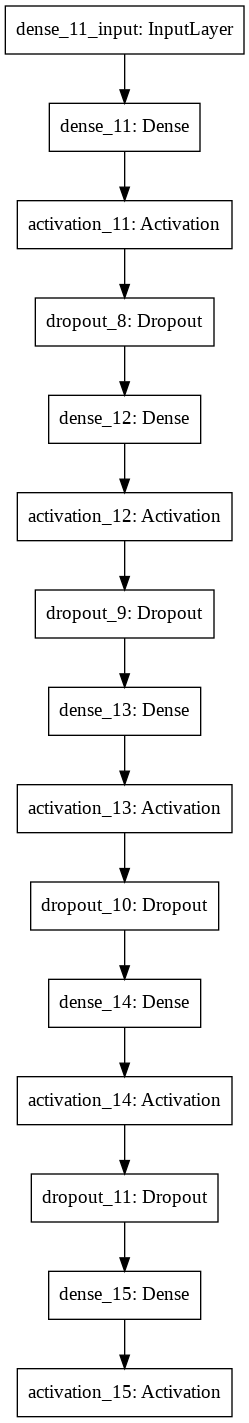

In [0]:
plot_model(model, to_file='model.png')

In [0]:
proba = model.predict(val_x)
proba[0].shape

(527,)

In [0]:
model.predict_classes(val_x)

array([418, 100, 418, ..., 418, 391, 387])

In [0]:
# Column names of validation_labels
Ycol=list(validation_labels)
Ycol

['A capella',
 'Accelerating, revving, vroom',
 'Accordion',
 'Acoustic guitar',
 'Afrobeat',
 'Air brake',
 'Air conditioning',
 'Air horn, truck horn',
 'Aircraft',
 'Aircraft engine',
 'Alarm',
 'Alarm clock',
 'Ambient music',
 'Ambulance (siren)',
 'Angry music',
 'Animal',
 'Applause',
 'Arrow',
 'Artillery fire',
 'Babbling',
 'Baby cry, infant cry',
 'Baby laughter',
 'Background music',
 'Bagpipes',
 'Bang',
 'Banjo',
 'Bark',
 'Basketball bounce',
 'Bass drum',
 'Bass guitar',
 'Bathtub (filling or washing)',
 'Battle cry',
 'Beatboxing',
 'Bee, wasp, etc.',
 'Beep, bleep',
 'Bell',
 'Bellow',
 'Belly laugh',
 'Bicycle',
 'Bicycle bell',
 'Bird',
 'Bird flight, flapping wings',
 'Bird vocalization, bird call, bird song',
 'Biting',
 'Bleat',
 'Blender',
 'Bluegrass',
 'Blues',
 'Boat, Water vehicle',
 'Boiling',
 'Boing',
 'Boom',
 'Bouncing',
 'Bow-wow',
 'Bowed string instrument',
 'Brass instrument',
 'Breaking',
 'Breathing',
 'Burping, eructation',
 'Burst, pop',
 'Bus',

In [0]:
predictions = proba
columns=Ycol
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["Filenames"]=validation_data.filename
ordered_cols=["Filenames"]+columns
results=results[ordered_cols]#To get the same column order

In [0]:
results=results.merge(df2,on='Filenames',how='inner')
results.head()

,Filenames,A capella,"Accelerating, revving, vroom",Accordion,Acoustic guitar,Afrobeat,Air brake,Air conditioning,"Air horn, truck horn",Aircraft,Aircraft engine,Alarm,Alarm clock,Ambient music,Ambulance (siren),Angry music,Animal,Applause,Arrow,Artillery fire,Babbling,"Baby cry, infant cry",Baby laughter,Background music,Bagpipes,Bang,Banjo,Bark,Basketball bounce,Bass drum,Bass guitar,Bathtub (filling or washing),Battle cry,Beatboxing,"Bee, wasp, etc.","Beep, bleep",Bell,Bellow,Belly laugh,Bicycle,...,Vibraphone,Vibration,Video game music,"Violin, fiddle",Vocal music,"Wail, moan","Walk, footsteps",Water,"Water tap, faucet",Waterfall,"Waves, surf",Wedding music,"Whack, thwack",Whale vocalization,Wheeze,Whimper,Whimper (dog),Whip,Whir,Whispering,Whistle,Whistling,White noise,Whoop,"Whoosh, swoosh, swish",Wild animals,Wind,Wind chime,"Wind instrument, woodwind instrument",Wind noise (microphone),Wood,Wood block,Writing,Yell,Yip,Yodeling,Zing,Zipper (clothing),Zither,Number_of_Labels
0,__4gqaraeje.mp3,0.000014,0.000132,0.000080,0.000342,0.000001,0.000081,0.000127,0.001452,0.000322,0.000112,0.014900,0.015912,0.000077,0.000280,0.000051,0.017487,0.000455,2.462178e-03,0.000138,0.000908,0.001703,0.000442,0.000102,0.000115,0.000348,0.000008,0.000351,0.000123,1.586974e-04,0.000074,0.002079,0.000008,0.000418,1.069427e-03,0.009647,0.004803,0.000376,0.001752,0.001365,...,0.000076,0.000617,0.000031,0.000089,0.000060,0.001279,0.001577,0.011050,3.193021e-03,0.000086,0.000008,0.000025,0.003035,0.000223,0.003725,0.002446,0.001687,0.006444,0.000816,1.711282e-02,0.009071,0.009745,0.000762,0.000364,0.002011,0.000382,0.000120,0.003868,0.002267,0.000065,0.004812,0.000647,3.149450e-03,0.000051,0.000110,0.000033,0.000215,0.001879,0.000016,4
1,__bfvypmvmo.mp3,0.008398,0.000003,0.012779,0.000214,0.000018,0.000016,0.000012,0.014698,0.000023,0.000010,0.000944,0.000419,0.002319,0.030488,0.000002,0.005037,0.000013,1.490116e-07,0.000007,0.000002,0.000296,0.000019,0.001950,0.007810,0.000594,0.020748,0.000158,0.000005,3.576279e-07,0.000009,0.000016,0.000053,0.000011,5.960464e-07,0.000009,0.026289,0.001086,0.000004,0.000002,...,0.000131,0.000365,0.004357,0.010010,0.004200,0.000112,0.000005,0.000026,1.788139e-07,0.000006,0.000003,0.000667,0.000075,0.000070,0.000000,0.003107,0.002052,0.000087,0.000046,1.490116e-07,0.000480,0.000029,0.000009,0.000832,0.000003,0.000114,0.000068,0.000410,0.106418,0.000007,0.000106,0.000891,3.576279e-07,0.000255,0.002076,0.026467,0.000528,0.000072,0.005503,1
2,__u7jouctco.mp3,0.000018,0.000107,0.000135,0.000290,0.000005,0.001020,0.000330,0.002465,0.001112,0.000625,0.009299,0.008406,0.000045,0.000650,0.000296,0.035771,0.009744,7.891953e-04,0.001413,0.000295,0.001954,0.001275,0.000226,0.000215,0.000856,0.000068,0.002921,0.002845,5.644560e-05,0.000057,0.000877,0.000185,0.001175,1.050651e-03,0.003835,0.000344,0.000434,0.002956,0.002517,...,0.000054,0.000441,0.000205,0.000190,0.000085,0.002033,0.001274,0.007721,5.083382e-04,0.000438,0.000459,0.000020,0.006472,0.000177,0.002290,0.003335,0.003153,0.008208,0.000374,1.629293e-04,0.002717,0.020713,0.000286,0.000429,0.002442,0.000375,0.001588,0.000592,0.001171,0.000604,0.004144,0.000618,1.153350e-04,0.000471,0.001912,0.000285,0.000178,0.000634,0.000026,1
3,__i_y1v8hy8.mp3,0.001646,0.001660,0.006128,0.003393,0.000761,0.002391,0.003121,0.020444,0.002628,0.001087,0.002550,0.005038,0.001304,0.004080,0.000729,0.025726,0.000733,2.952218e-04,0.001502,0.000382,0.003571,0.000493,0.004060,0.002064,0.004308,0.007087,0.001744,0.002465,7.768869e-04,0.001065,0.001118,0.001412,0.001932,6.475151e-04,0.002367,0.005161,0.003967,0.000730,0.003320,...,0.001216,0.002285,0.009690,0.006145,0.003004,0.001617,0.000868,0.006394,7.646680e-04,0.000442,0.000441,0.002442,0.006181,0.001182,0.000078,0.005960,0.002878,0.002413,0.001929,5.951524e-05,0.002491,0.001628,0.001908,0.004230,0.001608,0.001465,0.002685,0.002279,0.013670,0.001426,0.003461,0.003380,1.405478e-04,0.002679,0.005000,0.012280,0.004467,0.001950,0.002742,4
4,_0

In [0]:
#For its file with given k-number of labels, zero out all classes except for the top k probability-wise
for i in range(len(results)):
  a=results.iloc[i,1:-1].sort_values(ascending=False)[0:results.iloc[i,-1]].index
  results.iloc[i,1:-1]=0
  results.loc[i,a]=1

In [0]:
results

,Filenames,A capella,"Accelerating, revving, vroom",Accordion,Acoustic guitar,Afrobeat,Air brake,Air conditioning,"Air horn, truck horn",Aircraft,Aircraft engine,Alarm,Alarm clock,Ambient music,Ambulance (siren),Angry music,Animal,Applause,Arrow,Artillery fire,Babbling,"Baby cry, infant cry",Baby laughter,Background music,Bagpipes,Bang,Banjo,Bark,Basketball bounce,Bass drum,Bass guitar,Bathtub (filling or washing),Battle cry,Beatboxing,"Bee, wasp, etc.","Beep, bleep",Bell,Bellow,Belly laugh,Bicycle,...,Vibraphone,Vibration,Video game music,"Violin, fiddle",Vocal music,"Wail, moan","Walk, footsteps",Water,"Water tap, faucet",Waterfall,"Waves, surf",Wedding music,"Whack, thwack",Whale vocalization,Wheeze,Whimper,Whimper (dog),Whip,Whir,Whispering,Whistle,Whistling,White noise,Whoop,"Whoosh, swoosh, swish",Wild animals,Wind,Wind chime,"Wind instrument, woodwind instrument",Wind noise (microphone),Wood,Wood block,Writing,Yell,Yip,Yodeling,Zing,Zipper (clothing),Zither,Number_of_Labels
0,__4gqaraeje.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,__bfvypmvmo.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,__u7jouctco.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,__i_y1v8hy8.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,_0biyqjj9zu.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,_0camvqdp_y.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
6,_0gj8_vb1q4.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
7,_0rwzt_mifs.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,_0yudn_1yii.mp3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [0]:
#Run once - Save the results to drive
#os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment')# Export the variables 
#with open('prediction_results.pickle', 'wb') as f:
        #pickle.dump([results], f)

In [0]:
# Restore the variables
import pickle
os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment')
with open('prediction_results.pickle', 'rb') as f:
    results = pickle.load(f)

In [0]:
validation_labels.shape

(18672, 527)

In [0]:
y_true =validation_labels.values
y_true

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
y_pred=results.drop(columns=['Filenames','Number_of_Labels']).values
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
multilabel_confusion_matrix(y_true, y_pred)

array([[[18605,     7],
        [   58,     2]],

       [[18528,     4],
        [  139,     1]],

       [[18618,     0],
        [   54,     0]],

       ...,

       [[18602,    18],
        [   51,     1]],

       [[18615,     0],
        [   57,     0]],

       [[18609,     4],
        [   59,     0]]])

In [0]:
print(classification_report(y_true, y_pred, target_names=Ycol))

                                          precision    recall  f1-score   support

                               A capella       0.22      0.03      0.06        60
            Accelerating, revving, vroom       0.20      0.01      0.01       140
                               Accordion       0.00      0.00      0.00        54
                         Acoustic guitar       0.67      0.02      0.04        89
                                Afrobeat       0.12      0.18      0.14        56
                               Air brake       0.00      0.00      0.00        58
                        Air conditioning       0.00      0.00      0.00        58
                    Air horn, truck horn       0.00      0.00      0.00        53
                                Aircraft       0.12      0.11      0.11       108
                         Aircraft engine       1.00      0.02      0.04        56
                                   Alarm       0.08      0.05      0.06        55
               

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# The same process for another model with better quality data
#os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment/balanced/train')
def parser(row):
   # function to load files and extract features
   file_name = row.filename

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for better quality
      X, sample_rate = librosa.load(file_name, res_type='kaiser_best') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=128).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file_name)
      return None, None
 
   feature = mfccs
   label = row.labels
 
   return [feature]

temp = train_data.apply(parser, axis=1)

# Drop the arrays with the none values
temp = np.array(list(filter(None, temp)))

os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment/evaluate/validation')
def parser(row):

   # function to load files and extract features
   file_name = row.filename

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for better quality
      X, sample_rate = librosa.load(file_name, res_type='kaiser_best') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=128).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file_name, 'Row', row)
      return None
 
   feature = mfccs
   label = row.labels
 
   return [feature]

temp2 = validation_data.apply(parser, axis=1)

# Remove the None values if any
temp2 = np.array(list(filter(None, temp2)))


In [0]:
# Run once !
#import pickle
#os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment')# Export the variables 
#with open('train_and_validation_n_mfcc128.pickle', 'wb') as f:
     #pickle.dump([temp, temp2, train_labels,validation_labels], f)

In [0]:
# Restore the variables
import pickle
os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment')
with open('train_and_validation_n_mfcc128.pickle', 'rb') as f:
    temp, temp2,train_labels,validation_labels = pickle.load(f)

In [0]:
temp.shape

(19918, 1, 128)

In [0]:
x = temp.reshape(temp.shape[0],128)
y = np.array(train_labels).reshape(train_labels.shape[0],527)

val_x = temp2.reshape(temp2.shape[0],128)
val_y = np.array(validation_labels.values.tolist()).reshape(validation_labels.shape[0],527)


In [0]:
# Create the model
num_labels = len(labels)

# build model
model = Sequential()

model.add(Dense(512, input_shape=(128,)))
model.add(Activation('relu'))
model.add(Dropout(0.10))


model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Dense(527))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy','top_k_categorical_accuracy'], optimizer='adam')

es = keras.callbacks.EarlyStopping(monitor='val_top_k_categorical_accuracy', mode='max', verbose=1, patience=4)

model.summary()



W0905 19:47:26.373425 139890722207616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 19:47:26.425752 139890722207616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 19:47:26.433698 139890722207616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 19:47:26.458386 139890722207616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0905 19:47:26.468151 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [0]:
model.fit(x, y, epochs=50, validation_data=(val_x, val_y) , callbacks=[es])

Train on 19918 samples, validate on 18672 samples
Epoch 1/50
19918/19918 [==============================] - 14s 695us/step - loss: 0.0429 - acc: 0.9892 - top_k_categorical_accuracy: 0.1537 - val_loss: 0.0266 - val_acc: 0.9952 - val_top_k_categorical_accuracy: 0.1605
Epoch 2/50
19918/19918 [==============================] - 11s 557us/step - loss: 0.0250 - acc: 0.9955 - top_k_categorical_accuracy: 0.1799 - val_loss: 0.0251 - val_acc: 0.9953 - val_top_k_categorical_accuracy: 0.1684
Epoch 3/50
19918/19918 [==============================] - 11s 549us/step - loss: 0.0237 - acc: 0.9956 - top_k_categorical_accuracy: 0.1908 - val_loss: 0.0244 - val_acc: 0.9953 - val_top_k_categorical_accuracy: 0.1775
Epoch 4/50
19918/19918 [==============================] - 11s 555us/step - loss: 0.0228 - acc: 0.9956 - top_k_categorical_accuracy: 0.2025 - val_loss: 0.0238 - val_acc: 0.9953 - val_top_k_categorical_accuracy: 0.1846
Epoch 5/50
19918/19918 [==============================] - 11s 552us/step - loss: 0

In [0]:
proba = model.predict(val_x)
proba[0].shape

(527,)

In [0]:
model.predict_classes(val_x)
# Column names of validation_labels
Ycol=list(validation_labels)
predictions = proba
columns=Ycol
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["Filenames"]=validation_data.filename
ordered_cols=["Filenames"]+columns
results=results[ordered_cols]#To get the same column order
results=results.merge(df2,on='Filenames',how='inner')
results.head()

,Filenames,A capella,"Accelerating, revving, vroom",Accordion,Acoustic guitar,Afrobeat,Air brake,Air conditioning,"Air horn, truck horn",Aircraft,Aircraft engine,Alarm,Alarm clock,Ambient music,Ambulance (siren),Angry music,Animal,Applause,Arrow,Artillery fire,Babbling,"Baby cry, infant cry",Baby laughter,Background music,Bagpipes,Bang,Banjo,Bark,Basketball bounce,Bass drum,Bass guitar,Bathtub (filling or washing),Battle cry,Beatboxing,"Bee, wasp, etc.","Beep, bleep",Bell,Bellow,Belly laugh,Bicycle,...,Vibraphone,Vibration,Video game music,"Violin, fiddle",Vocal music,"Wail, moan","Walk, footsteps",Water,"Water tap, faucet",Waterfall,"Waves, surf",Wedding music,"Whack, thwack",Whale vocalization,Wheeze,Whimper,Whimper (dog),Whip,Whir,Whispering,Whistle,Whistling,White noise,Whoop,"Whoosh, swoosh, swish",Wild animals,Wind,Wind chime,"Wind instrument, woodwind instrument",Wind noise (microphone),Wood,Wood block,Writing,Yell,Yip,Yodeling,Zing,Zipper (clothing),Zither,Number_of_Labels
0,__4gqaraeje.mp3,0.000095,0.000197,0.000304,0.000091,2.115965e-06,0.000314,0.000248,0.006923,0.001893,0.000671,0.007585,0.023614,0.000042,0.000641,0.000004,0.027118,0.001133,0.003141,0.000351,0.000902,0.004331,0.000080,0.000050,0.000034,0.003010,0.000059,0.000663,0.002876,0.000068,0.000037,0.002416,0.000007,0.001494,0.000824,0.005363,0.002124,0.001315,0.001171,0.002216,...,0.000232,0.000838,0.000036,0.000073,0.000478,0.007972,0.001349,0.012249,0.003980,0.000543,0.000036,0.000209,0.002136,0.000467,0.005492,0.007149,0.001332,0.011512,0.002103,0.003888,0.014720,0.004346,0.004519,0.000497,0.007681,0.000424,0.000753,0.001749,0.001028,0.000154,0.004724,0.007819,0.001881,0.000131,0.000611,0.001037,0.000045,0.002139,0.000021,4
1,__bfvypmvmo.mp3,0.001473,0.000062,0.003187,0.000080,5.610287e-04,0.000052,0.000063,0.009464,0.000737,0.000101,0.002949,0.001781,0.004577,0.007961,0.000475,0.011205,0.000722,0.000020,0.000133,0.000138,0.000927,0.000114,0.001561,0.001971,0.001735,0.001342,0.001004,0.000220,0.000003,0.000028,0.000050,0.000208,0.000405,0.000023,0.000105,0.035322,0.009417,0.000039,0.000210,...,0.001222,0.000696,0.000225,0.001610,0.002451,0.001738,0.000043,0.000179,0.000024,0.000111,0.000025,0.001095,0.000553,0.003844,0.000096,0.004603,0.001309,0.000501,0.000391,0.000016,0.005474,0.000679,0.000630,0.003185,0.000291,0.000263,0.000310,0.001115,0.048902,0.000084,0.000138,0.002369,0.000007,0.002996,0.003293,0.022291,0.001163,0.000099,0.003626,1
2,__u7jouctco.mp3,0.000040,0.000155,0.000024,0.000061,8.344650e-07,0.000646,0.001223,0.002676,0.000376,0.000553,0.005088,0.001530,0.000002,0.000454,0.000002,0.043459,0.016095,0.002150,0.002578,0.002865,0.002959,0.005535,0.000011,0.000014,0.001178,0.000090,0.000914,0.008487,0.000020,0.000004,0.002961,0.000279,0.001080,0.001157,0.000543,0.000236,0.001714,0.008133,0.002318,...,0.000013,0.000244,0.000005,0.000011,0.000154,0.002405,0.005764,0.017677,0.002683,0.002682,0.000909,0.000004,0.003854,0.000177,0.006817,0.002540,0.002682,0.017705,0.002025,0.000524,0.001830,0.022601,0.001661,0.000448,0.001380,0.000873,0.005053,0.000207,0.000131,0.001770,0.010910,0.001513,0.000776,0.000181,0.001547,0.000901,0.000059,0.003325,0.000017,1
3,__i_y1v8hy8.mp3,0.000068,0.001960,0.000351,0.000145,2.819300e-05,0.004008,0.004042,0.009873,0.004203,0.003016,0.000540,0.001261,0.000176,0.013868,0.001543,0.027598,0.005924,0.000654,0.011296,0.000049,0.000745,0.000101,0.000326,0.000018,0.007370,0.000404,0.001148,0.013970,0.000209,0.000059,0.000256,0.001714,0.003456,0.000604,0.000565,0.000523,0.006862,0.000429,0.007744,...,0.000052,0.001802,0.000198,0.000077,0.000418,0.001116,0.001273,0.003616,0.000213,0.001190,0.002395,0.000060,0.001514,0.000594,0.000166,0.005702,0.003056,0.002947,0.006306,0.000069,0.000462,0.001075,0.003373,0.004431,0.003244,0.001692,0.011621,0.000214,0.000547,0.006936,0.003701,0.003219,0.000127,0.004509,0.005206,0.000988,0.001098,0.000387,0.000192,4
4,_0biyqjj9zu.mp3,0.000071,0.000091,0.000055,0.000095,5.364418e-07,0.000206,0.000462

In [0]:
#For its file with given k-number of labels, zero out all classes except for the top k probability-wise
for i in range(len(results)):
  a=results.iloc[i,1:-1].sort_values(ascending=False)[0:results.iloc[i,-1]].index
  results.iloc[i,1:-1]=0
  results.loc[i,a]=1

In [0]:
#Run once - Save the results to drive
#os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment')# Export the variables 
#with open('prediction_results_mfcc_128.pickle', 'wb') as f:
        #pickle.dump([results], f)

In [0]:
# Restore the variables
import pickle
os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment')
with open('prediction_results_mfcc_128.pickle', 'rb') as f:
    results = pickle.load(f)

In [0]:
y_true =validation_labels.values
y_pred=results.drop(columns=['Filenames','Number_of_Labels']).values
multilabel_confusion_matrix(y_true, y_pred)

array([[[18598,    14],
        [   53,     7]],

       [[18532,     0],
        [  140,     0]],

       [[18588,    30],
        [   54,     0]],

       ...,

       [[18618,     2],
        [   50,     2]],

       [[18615,     0],
        [   57,     0]],

       [[18601,    12],
        [   59,     0]]])

In [0]:
print(classification_report(y_true, y_pred, target_names=Ycol))

                                          precision    recall  f1-score   support

                               A capella       0.33      0.12      0.17        60
            Accelerating, revving, vroom       0.00      0.00      0.00       140
                               Accordion       0.00      0.00      0.00        54
                         Acoustic guitar       1.00      0.03      0.07        89
                                Afrobeat       0.25      0.04      0.06        56
                               Air brake       0.00      0.00      0.00        58
                        Air conditioning       0.00      0.00      0.00        58
                    Air horn, truck horn       0.00      0.00      0.00        53
                                Aircraft       0.25      0.06      0.10       108
                         Aircraft engine       0.40      0.04      0.07        56
                                   Alarm       0.07      0.02      0.03        55
               

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
import sklearn
x = temp.reshape(temp.shape[0],128)
y = np.array(train_labels).reshape(train_labels.shape[0],527)

val_x = temp2.reshape(temp2.shape[0],128)
val_y = np.array(validation_labels.values.tolist()).reshape(validation_labels.shape[0],527)


In [0]:
all_x = np.concatenate((x, val_x))
all_y = np.concatenate((y, val_y))

In [0]:
x_train = all_x[:37500]
y_train_labels = all_y[:37500]
val_x_train = all_x[37500:38045]
val_y_labels = all_y[37500:38045]
x_test = all_x[38045:]
y_test = all_y[38045:]

In [0]:
print(all_x.shape)
print(x_train.shape)
print(y_train_labels.shape)
print(val_x_train.shape)
print(val_y_labels.shape )
print(x_test.shape)
print(y_test.shape) 

(38590, 128)
(37500, 128)
(37500, 527)
(545, 128)
(545, 527)
(545, 128)
(545, 527)


In [0]:
# Create the model
num_labels = len(labels)

# build model
model = Sequential()

model.add(Dense(1024, input_shape=(128,)))
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.10))

model.add(Dense(527))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy','top_k_categorical_accuracy'], optimizer='adam')

es = keras.callbacks.EarlyStopping(monitor='val_top_k_categorical_accuracy', mode='max', verbose=1, patience=5)

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 1024)              132096    
_________________________________________________________________
activation_122 (Activation)  (None, 1024)              0         
_________________________________________________________________
dropout_92 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_93 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
activation_123 (Activation)  (None, 1024)              0         
_________________________________________________________________
dropout_93 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_94 (Dense)             (None, 512)               524800    
__________

In [0]:
model.fit(x_train, y_train_labels, epochs=500, validation_data=(val_x_train, val_y_labels) , callbacks=[es])

Train on 37500 samples, validate on 545 samples
Epoch 1/500
37500/37500 [==============================] - 15s 406us/step - loss: 0.0326 - acc: 0.9926 - top_k_categorical_accuracy: 0.1550 - val_loss: 0.0258 - val_acc: 0.9952 - val_top_k_categorical_accuracy: 0.1560
Epoch 2/500
37500/37500 [==============================] - 13s 339us/step - loss: 0.0243 - acc: 0.9954 - top_k_categorical_accuracy: 0.1734 - val_loss: 0.0242 - val_acc: 0.9953 - val_top_k_categorical_accuracy: 0.1651
Epoch 3/500
37500/37500 [==============================] - 12s 329us/step - loss: 0.0234 - acc: 0.9954 - top_k_categorical_accuracy: 0.1837 - val_loss: 0.0237 - val_acc: 0.9953 - val_top_k_categorical_accuracy: 0.1578
Epoch 4/500
37500/37500 [==============================] - 12s 326us/step - loss: 0.0230 - acc: 0.9955 - top_k_categorical_accuracy: 0.1910 - val_loss: 0.0235 - val_acc: 0.9953 - val_top_k_categorical_accuracy: 0.1743
Epoch 5/500
37500/37500 [==============================] - 12s 333us/step - loss

In [0]:
# Predict the test data
proba = model.predict(x_test)
proba.shape

(545, 527)

In [0]:
# Create a df with all data
frames = [train_data, validation_data]

all_data = pd.concat(frames)
all_data.shape

(38590, 2)

In [0]:
# Create a df with the labels of all data
frames = [train_labels, validation_labels]

all_labels = pd.concat(frames)
all_labels.shape

(38590, 527)

In [0]:
test_data = all_data.iloc[38045: , :]
test_data.shape

(545, 2)

In [0]:
test_labels = all_labels.iloc[38045: , :]
test_labels.shape

(545, 527)

In [0]:
Ycol=list(test_labels)
predictions = proba
columns=Ycol
results=pd.DataFrame(predictions, columns=columns)
results.head()

,A capella,"Accelerating, revving, vroom",Accordion,Acoustic guitar,Afrobeat,Air brake,Air conditioning,"Air horn, truck horn",Aircraft,Aircraft engine,...,Wind noise (microphone),Wood,Wood block,Writing,Yell,Yip,Yodeling,Zing,Zipper (clothing),Zither
0,0.001232,0.002185,0.000783,0.001963,0.011059,0.000622,0.000891,0.001357,0.001316,0.000946,...,0.000585,0.002726,0.003477,0.000262,0.005210,0.000371,0.002090,0.003680,0.002760,0.000977
1,0.031624,0.000069,0.052072,0.011891,0.000809,0.000038,0.000177,0.000993,0.000059,0.000030,...,0.000088,0.000424,0.001472,0.000217,0.000661,0.001170,0.010116,0.002420,0.001155,0.023402
2,0.000200,0.001811,0.000042,0.000020,0.000197,0.003687,0.003196,0.000965,0.002817,0.001585,...,0.003429,0.017466,0.004056,0.001555,0.000493,0.001870,0.000124,0.000230,0.004525,0.000042
3,0.004587,0.000028,0.037195,0.020555,0.000328,0.000009,0.000043,0.000109,0.000021,0.000010,...,0.000041,0.000097,0.000463,0.000333,0.000123,0.001372,0.002429,0.000823,0.000811,0.090394
4,0.000320,0.031900,0.000122,0.000014,0.000446,0.018960,0.007856,0.001783,0.057096,0.047445,...,0.004752,0.024671,0.006517,0.000106,0.004675,0.000409,0.000145,0.000220,0.001841,0.000018


In [0]:
d3 = {'Filenames': test_data.filename, 'Number_of_Labels': test_labels.sum(axis=1)}
df3 = pd.DataFrame(data=d3)
df3.head()

,Filenames,Number_of_Labels
18127,xt6v3ic72ne.mp3,3
18128,xtgmrlosjhk.mp3,2
18129,xttpclcq3_i.mp3,2
18130,xuewpyrae40.mp3,1
18131,xumby2noroi.mp3,3


In [0]:
test_data.shape

(545, 2)

In [0]:
# Column names of validation_labels
Ycol=list(test_labels)
predictions = proba
columns=Ycol
results=pd.DataFrame(predictions, columns=columns)
results.shape

(545, 527)

In [0]:
results["Filenames"]=test_data.reset_index().filename
ordered_cols=["Filenames"]+columns
results=results[ordered_cols]#To get the same column order
results=results.merge(df3,on='Filenames',how='inner')
results.head()

,Filenames,A capella,"Accelerating, revving, vroom",Accordion,Acoustic guitar,Afrobeat,Air brake,Air conditioning,"Air horn, truck horn",Aircraft,...,Wood,Wood block,Writing,Yell,Yip,Yodeling,Zing,Zipper (clothing),Zither,Number_of_Labels
0,xt6v3ic72ne.mp3,0.001232,0.002185,0.000783,0.001963,0.011059,0.000622,0.000891,0.001357,0.001316,...,0.002726,0.003477,0.000262,0.005210,0.000371,0.002090,0.003680,0.002760,0.000977,3
1,xtgmrlosjhk.mp3,0.031624,0.000069,0.052072,0.011891,0.000809,0.000038,0.000177,0.000993,0.000059,...,0.000424,0.001472,0.000217,0.000661,0.001170,0.010116,0.002420,0.001155,0.023402,2
2,xttpclcq3_i.mp3,0.000200,0.001811,0.000042,0.000020,0.000197,0.003687,0.003196,0.000965,0.002817,...,0.017466,0.004056,0.001555,0.000493,0.001870,0.000124,0.000230,0.004525,0.000042,2
3,xuewpyrae40.mp3,0.004587,0.000028,0.037195,0.020555,0.000328,0.000009,0.000043,0.000109,0.000021,...,0.000097,0.000463,0.000333,0.000123,0.001372,0.002429,0.000823,0.000811,0.090394,1
4,xumby2noroi.mp3,0.000320,0.031900,0.000122,0.000014,0.000446,0.018960,0.007856,0.001783,0.057096,...,0.024671,0.006517,0.000106,0.004675,0.000409,0.000145,0.000220,0.001841,0.000018,3


In [0]:
#For its file with given k-number of labels, zero out all classes except for the top k probability-wise
for i in range(len(results)):
  a=results.iloc[i,1:-1].sort_values(ascending=False)[0:results.iloc[i,-1]].index
  results.iloc[i,1:-1]=0
  results.loc[i,a]=1

In [0]:
y_true =test_labels.values
y_pred=results.drop(columns=['Filenames','Number_of_Labels']).values
print(classification_report(y_true, y_pred, target_names=Ycol))

                                          precision    recall  f1-score   support

                               A capella       0.00      0.00      0.00         3
            Accelerating, revving, vroom       0.00      0.00      0.00         5
                               Accordion       0.00      0.00      0.00         2
                         Acoustic guitar       1.00      1.00      1.00         1
                                Afrobeat       0.00      0.00      0.00         0
                               Air brake       0.00      0.00      0.00         3
                        Air conditioning       0.00      0.00      0.00         0
                    Air horn, truck horn       0.00      0.00      0.00         3
                                Aircraft       0.00      0.00      0.00         4
                         Aircraft engine       0.00      0.00      0.00         2
                                   Alarm       0.00      0.00      0.00         5
               

# Preparation for training - image classification 

In [0]:
# Ran only one time the above 3 lines of code
#os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment/balanced')
#!mkdir train 
#!unzip -q balanced.zip -d train/  #unzip data in train/
os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment/balanced/train')

In [0]:
#Show the list of the files
os.listdir('/content/gdrive/My Drive/Big Data Analytics Assignment/balanced/train')

['00m9fhcet6s.mp3',
 '00me_lhe_r8.mp3',
 '00w1lcxw_wu.mp3',
 '0150dzu3na8.mp3',
 '01b907_gyys.mp3',
 '01bts8o2xnc.mp3',
 '01hjvjn9xcg.mp3',
 '01k1v_ngjws.mp3',
 '01pzcpkt3_e.mp3',
 '01q8wkx4xeq.mp3',
 '01xpkyi0rxa.mp3',
 '021b2ozajng.mp3',
 '0298wje3_tk.mp3',
 '02aq42rdm2q.mp3',
 '02jevdacq7u.mp3',
 '02n2i1jhq4u.mp3',
 '02pl9paqwmi.mp3',
 '02qntw26enm.mp3',
 '02rlonmso9k.mp3',
 '02r_w3cr1i4.mp3',
 '02tl_ek8f9i.mp3',
 '02z_7duc_74.mp3',
 '032fsmmkwqm.mp3',
 '03frqgyrgq4.mp3',
 '03kfltzgubs.mp3',
 '03laxcmqsmu.mp3',
 '03nlmemi8_i.mp3',
 '03z0rpikm5g.mp3',
 '046ynbcwm90.mp3',
 '04gv6msfima.mp3',
 '04jkx_vlepe.mp3',
 '04rdchpgztm.mp3',
 '04sfloexhdo.mp3',
 '058nv060fz4.mp3',
 '05h3cbb2oii.mp3',
 '05ojdyehlmc.mp3',
 '05wedbchyjm.mp3',
 '06brdf83rze.mp3',
 '06iu9wsep3s.mp3',
 '06j19koru_4.mp3',
 '06kafcdyj3u.mp3',
 '06k_cxmaeay.mp3',
 '06ot6nqaulm.mp3',
 '06pzxiqzqxm.mp3',
 '06slgimrwlw.mp3',
 '06yvt1kizly.mp3',
 '075shaj6j3y.mp3',
 '07avkzp3k7q.mp3',
 '07eqfg1ixzw.mp3',
 '07j4uvmpsw4.mp3',


C:\Users\vagel\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


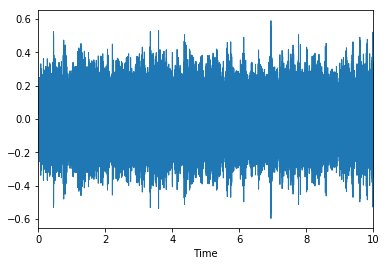

In [0]:
y, sr = librosa.load('__ekdldtuxa.mp3')
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
librosa.display.waveplot(y, sr=sr)


In [0]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))


In [0]:
# Load the example clip
y, sr = librosa.load('__ekdldtuxa.mp3')

# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

C:\Users\vagel\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
C:\Users\vagel\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [0]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
mfcc_delta = librosa.feature.delta(mfcc)
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

In [0]:
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

In [0]:
beat_features

array([[ 7.24724514e-01,  6.08406648e-01,  5.95945837e-01,
         5.80355268e-01,  6.89813950e-01,  5.43148799e-01,
         5.29781916e-01,  5.37049240e-01,  3.10386761e-01,
         3.45136252e-01,  5.81268584e-01,  5.26400511e-01,
         3.14213209e-01,  4.51249943e-01,  4.44123638e-01,
         6.62273154e-01,  5.65567839e-01,  7.04000000e-01,
         4.95136697e-01,  3.95046937e-01,  4.25274987e-01],
       [ 6.83947266e-01,  5.12431929e-01,  6.40563984e-01,
         8.25750221e-01,  1.00000000e+00,  7.83836137e-01,
         4.18479107e-01,  4.01249523e-01,  5.06756506e-01,
         4.03074192e-01,  5.02146919e-01,  4.89741396e-01,
         2.77266455e-01,  4.09477680e-01,  4.65165891e-01,
         8.30622208e-01,  7.53911588e-01,  1.00000000e+00,
         5.93821860e-01,  4.70192074e-01,  3.77536921e-01],
       [ 8.15177268e-01,  6.01667444e-01,  6.09336212e-01,
         5.84922713e-01,  5.20435604e-01,  6.81880962e-01,
         4.58849191e-01,  6.23749230e-01,  8.67097321e

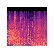

In [0]:
clip, sample_rate = librosa.load('_hn5kqckpea.mp3', sr=None)
fig = plt.figure(figsize=[0.72,0.72])
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
 

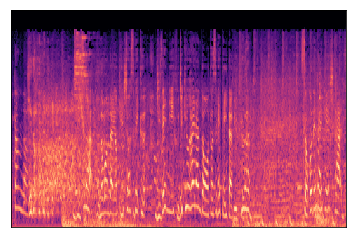

In [0]:
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))


In [0]:
def create_spectrogram(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  ='/content/gdrive/My Drive/Big Data Analytics Assignment/balanced/train'+'/images/' + name + '.jpg'
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [0]:
#run once
#os.mkdir('/content/gdrive/My Drive/Big Data Analytics Assignment/balanced/train'+'/images')

In [0]:
DataDir='/content/gdrive/My Drive/Big Data Analytics Assignment/balanced/train/'+train_data['filename']

In [0]:
i=0
for file in DataDir[i:len(DataDir)]:
    #Define the filename as is, "name" refers to the JPG, and is split off into the number itself. 
    filename,name = file,file.split('/')[-1].split('.')[0]
    create_spectrogram(filename,name)
gc.collect()

**Validation Dataset**

In [0]:
#run once
#os.mkdir('/content/gdrive/My Drive/Big Data Analytics Assignment/evaluate/validation'+'/images')
def create_spectrogram2(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  ='/content/gdrive/My Drive/Big Data Analytics Assignment/evaluate/validation'+'/images/' + name + '.jpg'
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [0]:
DataDir2='/content/gdrive/My Drive/Big Data Analytics Assignment/evaluate/validation/'+validation_data['filename']
len(DataDir2)

18672

In [0]:
i=0
for file in DataDir2[i:len(DataDir2)]:
    #Define the filename as is, "name" refers to the JPG, and is split off into the number itself. 
    filename,name = file,file.split('/')[-1].split('.')[0]
    create_spectrogram2(filename,name)
gc.collect()

KeyboardInterrupt: 

**Back to training**

In [0]:
Tr=train_data['filename'].replace('.mp3','.jpg',regex=True)

In [0]:
Ycol=list(train_labels)

In [0]:
train_labels['filenames']=Tr

In [0]:
#Για το φοβο το Train & Validate ιδια στα labels
Ycol==list(validation_labels)

True

In [0]:
Va=validation_data['filename'].replace('.mp3','.jpg',regex=True)
validation_labels['filenames']=Va

In [0]:
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [0]:
#Create new dir with all image files
#os.mkdir('/content/gdrive/My Drive/Big Data Analytics Assignment/images')
from distutils.dir_util import copy_tree

# copy subdirectory example
fromDirectory = '/content/gdrive/My Drive/Big Data Analytics Assignment/balanced/train/images'
toDirectory = '/content/gdrive/My Drive/Big Data Analytics Assignment/images'

copy_tree(fromDirectory, toDirectory)


['/content/gdrive/My Drive/Big Data Analytics Assignment/images/zno9k9rvlio.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/znqq94j8vdc.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/znrftzrwsmg.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/znsfgjhfdpo.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/znswu3pmyn0.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/znutbwd5dde.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/znx_7j3e7xk.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/znxalm9vp4q.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/znvm9vqv6es.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/znwyoguh4ey.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/znyhzcirmfy.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/znyap0_4vjw.jpg',
 '/content/gdriv

In [0]:
from distutils.dir_util import copy_tree

fromDirectory = '/content/gdrive/My Drive/Big Data Analytics Assignment/evaluate/validation/images'
toDirectory = '/content/gdrive/My Drive/Big Data Analytics Assignment/images'

copy_tree(fromDirectory, toDirectory)


['/content/gdrive/My Drive/Big Data Analytics Assignment/images/w2bas3lug3c.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/w2vmywh5nto.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/w2ze86yagf8.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/w33ycm8ti2i.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/w3qishxqfpe.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/w4_k89iislw.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/w45oobpuoq0.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/w4a7yeo82hw.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/w4z1qubomwu.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/w4_26whfzko.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/w4enmhlllkq.jpg',
 '/content/gdrive/My Drive/Big Data Analytics Assignment/images/w51hjqg0k7o.jpg',
 '/content/gdriv

In [0]:
#os.chdir('/content/gdrive/My Drive/Big Data Analytics Assignment/images')
len(os.listdir('/content/gdrive/My Drive/Big Data Analytics Assignment/images'))

38590

In [0]:
Ttl = pd.concat([train_labels,validation_labels])
Ttl.head()

,A capella,"Accelerating, revving, vroom",Accordion,Acoustic guitar,Afrobeat,Air brake,Air conditioning,"Air horn, truck horn",Aircraft,Aircraft engine,...,Wood,Wood block,Writing,Yell,Yip,Yodeling,Zing,Zipper (clothing),Zither,filenames
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,__pjhxphwes.jpg
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,__zhevvpy1s.jpg
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,__ae2o5g5we.jpg
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,__aailorkii.jpg
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,__cb2zvjpna.jpg


In [0]:
dtSize=round(len(Ttl))
print(round(dtSize*0.85),"Training") #olo to dataset 85% train
print(round(dtSize*0.10),"Validation")
print(round(dtSize*0.05),"Testing")

32802 Training
3859 Validation
1930 Testing


In [0]:
train_generator=datagen.flow_from_dataframe(
dataframe=Ttl[:round(dtSize*0.85)],
directory='/content/gdrive/My Drive/Big Data Analytics Assignment/images',
x_col="filenames",
y_col=Ycol,
batch_size=64,
seed=42,
shuffle=True,
class_mode="other",
target_size=(64,64))

C:\Users\vagel\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:273: UserWarning: Found 7 invalid image filename(s) in x_col="filenames". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 32795 validated image filenames.


In [0]:
valid_generator=test_datagen.flow_from_dataframe(
dataframe=Ttl[round(dtSize*0.85):round(dtSize*0.95)],
directory='/content/gdrive/My Drive/Big Data Analytics Assignment/images',
x_col="filenames",
y_col=Ycol,
batch_size=64,
seed=42,
shuffle=True,
class_mode="other",
target_size=(64,64))

Found 3858 validated image filenames.


2845/2845

In [0]:
test_generator=test_datagen.flow_from_dataframe(
dataframe=Ttl[round(dtSize*0.95):],
directory='/content/gdrive/My Drive/Big Data Analytics Assignment/evaluate/validation/images',
x_col="filenames",
batch_size=4,
seed=42,
shuffle=False,
class_mode=None,
target_size=(64,64))

Found 1930 validated image filenames.


8532/8535


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(Ycol), activation='sigmoid'))
model.compile(keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=['accuracy','top_k_categorical_accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_16 (Activation)   (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 31, 31, 64)        36928     
__________

In [0]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))
model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(len(Ycol), activation='sigmoid'))
model2.compile(keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=['accuracy','top_k_categorical_accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)


model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_37 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_38 (Activation)   (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 31, 31, 64)        36928     
__________

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
print(STEP_SIZE_TRAIN,STEP_SIZE_VALID,STEP_SIZE_TEST)

512 60 482


In [0]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=200,
                    validation_data=valid_generator,
                    validation_steps=50,
                    epochs=500,callbacks=[es]
)

Epoch 1/500
200/200 [==============================] - 25s 126ms/step - loss: 0.0850 - acc: 0.9707 - top_k_categorical_accuracy: 0.0674 - val_loss: 0.0674 - val_acc: 0.9951 - val_top_k_categorical_accuracy: 0.1588
Epoch 2/500
200/200 [==============================] - 25s 127ms/step - loss: 0.0290 - acc: 0.9951 - top_k_categorical_accuracy: 0.1367 - val_loss: 0.0669 - val_acc: 0.9951 - val_top_k_categorical_accuracy: 0.1639
Epoch 3/500
200/200 [==============================] - 26s 132ms/step - loss: 0.0276 - acc: 0.9952 - top_k_categorical_accuracy: 0.1441 - val_loss: 0.0514 - val_acc: 0.9951 - val_top_k_categorical_accuracy: 0.1585
Epoch 4/500
200/200 [==============================] - 26s 131ms/step - loss: 0.0271 - acc: 0.9953 - top_k_categorical_accuracy: 0.1453 - val_loss: 0.0483 - val_acc: 0.9951 - val_top_k_categorical_accuracy: 0.1631
Epoch 5/500
200/200 [==============================] - 26s 130ms/step - loss: 0.0264 - acc: 0.9954 - top_k_categorical_accuracy: 0.1595 - val_lo

200/200 [==============================] - 25s 126ms/step - loss: 0.0222 - acc: 0.9955 - top_k_categorical_accuracy: 0.1975 - val_loss: 0.0231 - val_acc: 0.9953 - val_top_k_categorical_accuracy: 0.1858
Epoch 40/500
200/200 [==============================] - 25s 123ms/step - loss: 0.0220 - acc: 0.9956 - top_k_categorical_accuracy: 0.1993 - val_loss: 0.0229 - val_acc: 0.9953 - val_top_k_categorical_accuracy: 0.1950
Epoch 41/500
200/200 [==============================] - 25s 126ms/step - loss: 0.0220 - acc: 0.9956 - top_k_categorical_accuracy: 0.2028 - val_loss: 0.0231 - val_acc: 0.9953 - val_top_k_categorical_accuracy: 0.1890
Epoch 42/500
200/200 [==============================] - 25s 126ms/step - loss: 0.0220 - acc: 0.9955 - top_k_categorical_accuracy: 0.1980 - val_loss: 0.0230 - val_acc: 0.9953 - val_top_k_categorical_accuracy: 0.1928
Epoch 43/500
200/200 [==============================] - 25s 126ms/step - loss: 0.0220 - acc: 0.9955 - top_k_categorical_accuracy: 0.2031 - val_loss: 0.02

In [0]:
model2.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=500,callbacks=[es]
)

Epoch 1/500
512/512 [==============================] - 54s 106ms/step - loss: 0.0509 - acc: 0.9855 - top_k_categorical_accuracy: 0.1111 - val_loss: 0.0630 - val_acc: 0.9951 - val_top_k_categorical_accuracy: 0.1547
Epoch 2/500
512/512 [==============================] - 61s 120ms/step - loss: 0.0269 - acc: 0.9953 - top_k_categorical_accuracy: 0.1513 - val_loss: 0.0473 - val_acc: 0.9951 - val_top_k_categorical_accuracy: 0.1653
Epoch 3/500
512/512 [==============================] - 61s 119ms/step - loss: 0.0261 - acc: 0.9953 - top_k_categorical_accuracy: 0.1616 - val_loss: 0.0364 - val_acc: 0.9951 - val_top_k_categorical_accuracy: 0.1603
Epoch 4/500
512/512 [==============================] - 61s 119ms/step - loss: 0.0256 - acc: 0.9953 - top_k_categorical_accuracy: 0.1672 - val_loss: 0.0332 - val_acc: 0.9951 - val_top_k_categorical_accuracy: 0.1566
Epoch 5/500
512/512 [==============================] - 62s 120ms/step - loss: 0.0250 - acc: 0.9954 - top_k_categorical_accuracy: 0.1722 - val_lo

In [0]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [0]:
model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)

[0.0229525894091578, 0.9953236964795862, 0.18713758566549846]

In [0]:
model2.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)

[0.022511793172863764, 0.995307187344064, 0.20268845545991068]

In [0]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=len(Ttl[round(dtSize*0.95):]),
verbose=1)

1930/1930 [==============================] - 5s 3ms/step


In [0]:
test_generator.reset()
pred2=model2.predict_generator(test_generator,
steps=1930,
verbose=1)

1930/1930 [==============================] - 5s 3ms/step


In [0]:
Ttl2=pd.concat([train_data,validation_data])

In [0]:
Ttl2.iloc[round(dtSize*0.95),]

filename                shlva7x1vts.mp3
labels      Bird flight, flapping wings
Name: 16742, dtype: object

In [0]:
Ycol=list(train_labels)
Ycol

['A capella',
 'Accelerating, revving, vroom',
 'Accordion',
 'Acoustic guitar',
 'Afrobeat',
 'Air brake',
 'Air conditioning',
 'Air horn, truck horn',
 'Aircraft',
 'Aircraft engine',
 'Alarm',
 'Alarm clock',
 'Ambient music',
 'Ambulance (siren)',
 'Angry music',
 'Animal',
 'Applause',
 'Arrow',
 'Artillery fire',
 'Babbling',
 'Baby cry, infant cry',
 'Baby laughter',
 'Background music',
 'Bagpipes',
 'Bang',
 'Banjo',
 'Bark',
 'Basketball bounce',
 'Bass drum',
 'Bass guitar',
 'Bathtub (filling or washing)',
 'Battle cry',
 'Beatboxing',
 'Bee, wasp, etc.',
 'Beep, bleep',
 'Bell',
 'Bellow',
 'Belly laugh',
 'Bicycle',
 'Bicycle bell',
 'Bird',
 'Bird flight, flapping wings',
 'Bird vocalization, bird call, bird song',
 'Biting',
 'Bleat',
 'Blender',
 'Bluegrass',
 'Blues',
 'Boat, Water vehicle',
 'Boiling',
 'Boing',
 'Boom',
 'Bouncing',
 'Bow-wow',
 'Bowed string instrument',
 'Brass instrument',
 'Breaking',
 'Breathing',
 'Burping, eructation',
 'Burst, pop',
 'Bus',

In [0]:
predictions = pred
columns=Ycol
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["Filenames"]=test_generator.filenames

ordered_cols=["Filenames"]+columns
results=results[ordered_cols]#To get the same column order

In [0]:
predictions2 = pred2
columns=Ycol
#columns should be the same order of y_col
results2=pd.DataFrame(predictions2, columns=columns)
results2["Filenames"]=test_generator.filenames

ordered_cols2=["Filenames"]+columns
results2=results2[ordered_cols2]#To get the same column order

In [0]:
results

,Filenames,A capella,"Accelerating, revving, vroom",Accordion,Acoustic guitar,Afrobeat,Air brake,Air conditioning,"Air horn, truck horn",Aircraft,...,Wind noise (microphone),Wood,Wood block,Writing,Yell,Yip,Yodeling,Zing,Zipper (clothing),Zither
0,shlva7x1vts.jpg,0.000280,0.001810,0.000135,0.000306,0.000458,0.002417,0.003331,0.002041,0.001371,...,0.004895,0.027627,0.004158,0.007671,0.000809,0.003870,0.000248,0.000701,0.007282,0.000091
1,shwrivi_xb8.jpg,0.001773,0.005956,0.001738,0.000735,0.001784,0.007634,0.003508,0.003051,0.006835,...,0.007322,0.017818,0.001502,0.000945,0.014732,0.001034,0.002184,0.004459,0.001686,0.000489
2,shy9foblt7y.jpg,0.002495,0.001519,0.002059,0.002722,0.000090,0.000546,0.001032,0.006975,0.001848,...,0.000948,0.002020,0.001384,0.002209,0.000430,0.003440,0.001343,0.000377,0.000992,0.002866
3,si9pc5lpc_8.jpg,0.000822,0.000824,0.000562,0.001225,0.000053,0.000284,0.000692,0.003870,0.000852,...,0.000622,0.001847,0.001378,0.002461,0.000168,0.002547,0.000475,0.000175,0.000909,0.000962
4,sia_iuti7ay.jpg,0.004603,0.001084,0.005767,0.004073,0.019499,0.000970,0.000322,0.002038,0.000757,...,0.000417,0.005157,0.001891,0.000355,0.009174,0.000380,0.004998,0.014892,0.001206,0.002046
5,sieknqwes8k.jpg,0.001030,0.000354,0.000378,0.001372,0.000687,0.000463,0.001163,0.002844,0.000175,...,0.000860,0.010751,0.010361,0.009514,0.000378,0.008055,0.000992,0.000633,0.008670,0.000615
6,sitvgqmhpta.jpg,0.001336,0.002604,0.000646,0.003235,0.000168,0.000406,0.000956,0.001880,0.001142,...,0.001788,0.000929,0.001369,0.002065,0.000276,0.001463,0.000726,0.000442,0.000855,0.001910
7,sivkacc6mye.jpg,0.000102,0.000968,0.000043,0.000122,0.000100,0.001102,0.002440,0.001490,0.000838,...,0.002992,0.020978,0.002351,0.006120,0.000193,0.002790,0.000087,0.000202,0.004451,0.000035
8,sizveuekgfa.jpg,0.001271,0.001170,0.000662,0.001318,0.000235,0.001523,0.002895,0.003845,0.000608,...,0.003675,0.009181,0.007164,0.006209,0.000862,0.011245,0.001510,0.000490,0.007015,0.000860
9,sivddobkvoi.jpg,0.000584,0.001128,0.000456,0.000291,0.000185,0.002114,0.002703,0.004302,0.001630,...,0.002581,0.019310,0.002716,0.002604,0.001360,0.004204,0.000608,0.000531,0.003480,0.000202


In [0]:
d = {'Filenames': Va, 'Number_of_Labels': validation_labels.sum(axis=1)}
df = pd.DataFrame(data=d)
df.head()

,Filenames,Number_of_Labels
0,__4gqaraeje.jpg,4
1,__bfvypmvmo.jpg,1
2,__u7jouctco.jpg,1
3,__i_y1v8hy8.jpg,4
4,_0biyqjj9zu.jpg,3


In [0]:

d2 = {'Filenames': Tr, 'Number_of_Labels': train_labels.sum(axis=1)}
df2 = pd.DataFrame(data=d2)
df2.head()

,Filenames,Number_of_Labels
0,__pjhxphwes.jpg,2
1,__zhevvpy1s.jpg,1
2,__ae2o5g5we.jpg,3
3,__aailorkii.jpg,2
4,__cb2zvjpna.jpg,1


In [0]:
Ttl3=pd.concat([df,df2])
Ttl3.shape

(38590, 2)

In [0]:
results=results.merge(Ttl3,on='Filenames',how='inner')

In [0]:
results2=results2.merge(Ttl3,on='Filenames',how='inner')

In [0]:
results.head()

,Filenames,A capella,"Accelerating, revving, vroom",Accordion,Acoustic guitar,Afrobeat,Air brake,Air conditioning,"Air horn, truck horn",Aircraft,...,Wood,Wood block,Writing,Yell,Yip,Yodeling,Zing,Zipper (clothing),Zither,Number_of_Labels
0,shlva7x1vts.jpg,0.000280,0.001810,0.000135,0.000306,0.000458,0.002417,0.003331,0.002041,0.001371,...,0.027627,0.004158,0.007671,0.000809,0.003870,0.000248,0.000701,0.007282,0.000091,1
1,shwrivi_xb8.jpg,0.001773,0.005956,0.001738,0.000735,0.001784,0.007634,0.003508,0.003051,0.006835,...,0.017818,0.001502,0.000945,0.014732,0.001034,0.002184,0.004459,0.001686,0.000489,6
2,shy9foblt7y.jpg,0.002495,0.001519,0.002059,0.002722,0.000090,0.000546,0.001032,0.006975,0.001848,...,0.002020,0.001384,0.002209,0.000430,0.003440,0.001343,0.000377,0.000992,0.002866,2
3,si9pc5lpc_8.jpg,0.000822,0.000824,0.000562,0.001225,0.000053,0.000284,0.000692,0.003870,0.000852,...,0.001847,0.001378,0.002461,0.000168,0.002547,0.000475,0.000175,0.000909,0.000962,2
4,sia_iuti7ay.jpg,0.004603,0.001084,0.005767,0.004073,0.019499,0.000970,0.000322,0.002038,0.000757,...,0.005157,0.001891,0.000355,0.009174,0.000380,0.004998,0.014892,0.001206,0.002046,3


In [0]:
temp=results

In [0]:
#a=temp.iloc[0,1:-1].sort_values(ascending=False)[0:temp.iloc[0,-1]].index

In [0]:
#temp.iloc[0,1:-1]=0
#temp.loc[0,a]=1

In [0]:
#For its file with given k-number of labels, zero out all classes except for the top k probability-wise
for i in range(len(results)):
  a=temp.iloc[i,1:-1].sort_values(ascending=False)[0:temp.iloc[i,-1]].index
  temp.iloc[i,1:-1]=0
  temp.loc[i,a]=1

In [0]:
temp.shape

(1930, 529)

In [0]:
temp2=results2
#For its file with given k-number of labels, zero out all classes except for the top k probability-wise
for i in range(len(results2)):
  a=temp2.iloc[i,1:-1].sort_values(ascending=False)[0:temp2.iloc[i,-1]].index
  temp2.iloc[i,1:-1]=0
  temp2.loc[i,a]=1
temp2.shape

(1930, 529)

In [0]:
# bn.argpartition(-results.iloc[0:1,1:-1], 3)[0][0:3]
Ttl.iloc[round(dtSize*.95):,]

,A capella,"Accelerating, revving, vroom",Accordion,Acoustic guitar,Afrobeat,Air brake,Air conditioning,"Air horn, truck horn",Aircraft,Aircraft engine,...,Wood,Wood block,Writing,Yell,Yip,Yodeling,Zing,Zipper (clothing),Zither,filenames
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,__pjhxphwes.jpg
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,__zhevvpy1s.jpg
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,__ae2o5g5we.jpg
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,__aailorkii.jpg
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,__cb2zvjpna.jpg


In [0]:
y_true =Ttl.iloc[round(dtSize*.95):].drop(columns=['filenames']).values
y_true.shape

(1930, 527)

In [0]:
y_pred=temp.drop(columns=['Filenames','Number_of_Labels']).values
y_pred.shape

(1930, 527)

In [0]:
y_pred2=temp2.drop(columns=['Filenames','Number_of_Labels']).values
y_pred2.shape

(1930, 527)

In [0]:
multilabel_confusion_matrix(y_true, y_pred)

array([[[100,   0],
        [  0,   0]],

       [[100,   0],
        [  0,   0]],

       [[100,   0],
        [  0,   0]],

       ...,

       [[100,   0],
        [  0,   0]],

       [[100,   0],
        [  0,   0]],

       [[100,   0],
        [  0,   0]]])

In [0]:
print(classification_report(y_true, y_pred, target_names=Ycol))

                                          precision    recall  f1-score   support

                               A capella       0.00      0.00      0.00         5
            Accelerating, revving, vroom       0.00      0.00      0.00        20
                               Accordion       0.00      0.00      0.00         8
                         Acoustic guitar       0.00      0.00      0.00         7
                                Afrobeat       0.00      0.00      0.00         4
                               Air brake       0.00      0.00      0.00         7
                        Air conditioning       0.00      0.00      0.00         6
                    Air horn, truck horn       0.00      0.00      0.00         6
                                Aircraft       0.33      0.20      0.25        15
                         Aircraft engine       0.00      0.00      0.00         6
                                   Alarm       0.00      0.00      0.00         9
               

C:\Users\vagel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vagel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
print(classification_report(y_true, y_pred2, target_names=Ycol))

                                          precision    recall  f1-score   support

                               A capella       0.00      0.00      0.00         5
            Accelerating, revving, vroom       0.00      0.00      0.00        20
                               Accordion       0.00      0.00      0.00         8
                         Acoustic guitar       0.00      0.00      0.00         7
                                Afrobeat       0.00      0.00      0.00         4
                               Air brake       0.00      0.00      0.00         7
                        Air conditioning       0.00      0.00      0.00         6
                    Air horn, truck horn       0.00      0.00      0.00         6
                                Aircraft       0.38      0.20      0.26        15
                         Aircraft engine       0.00      0.00      0.00         6
                                   Alarm       0.00      0.00      0.00         9
               

In [0]:
# another model with more training data

In [0]:
dtSize=round(len(Ttl))
print(round(dtSize*0.96),"Training") 
print(round(dtSize*0.02),"Validation")
print(round(dtSize*0.02),"Testing")


37046 Training
772 Validation
772 Testing


In [0]:
train_generator=datagen.flow_from_dataframe(
dataframe=Ttl[:round(dtSize*0.96)],
directory='/content/gdrive/My Drive/Big Data Analytics Assignment/images',
x_col="filenames",
y_col=Ycol,
batch_size=64,
seed=42,
shuffle=True,
class_mode="other",
target_size=(64,64))

valid_generator=test_datagen.flow_from_dataframe(
dataframe=Ttl[round(dtSize*0.96):round(dtSize*0.98)],
directory='/content/gdrive/My Drive/Big Data Analytics Assignment/images',
x_col="filenames",
y_col=Ycol,
batch_size=64,
seed=42,
shuffle=True,
class_mode="other",
target_size=(64,64))

test_generator=test_datagen.flow_from_dataframe(
dataframe=Ttl[round(dtSize*0.98):],
directory='/content/gdrive/My Drive/Big Data Analytics Assignment/evaluate/validation/images',
x_col="filenames",
batch_size=64,
seed=42,
shuffle=False,
class_mode=None,
target_size=(64,64))


Found 37039 validated image filenames.
Found 772 validated image filenames.
Found 772 validated image filenames.


In [0]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.5))
model3.add(Conv2D(128, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(128, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(len(Ycol), activation='sigmoid'))
model3.compile(keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=['accuracy','top_k_categorical_accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)


model3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_51 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_52 (Activation)   (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 31, 31, 64)        36928     
__________

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
print(STEP_SIZE_TRAIN,STEP_SIZE_VALID,STEP_SIZE_TEST)


578 12 12


In [0]:
model3.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=500,callbacks=[es]
)

Epoch 1/500
578/578 [==============================] - 56s 97ms/step - loss: 0.0483 - acc: 0.9865 - top_k_categorical_accuracy: 0.1127 - val_loss: 0.0753 - val_acc: 0.9951 - val_top_k_categorical_accuracy: 0.1654
Epoch 2/500
578/578 [==============================] - 66s 113ms/step - loss: 0.0269 - acc: 0.9953 - top_k_categorical_accuracy: 0.1521 - val_loss: 0.0442 - val_acc: 0.9951 - val_top_k_categorical_accuracy: 0.1596
Epoch 3/500
578/578 [==============================] - 66s 114ms/step - loss: 0.0261 - acc: 0.9953 - top_k_categorical_accuracy: 0.1600 - val_loss: 0.0356 - val_acc: 0.9951 - val_top_k_categorical_accuracy: 0.1624
Epoch 4/500
578/578 [==============================] - 65s 113ms/step - loss: 0.0256 - acc: 0.9953 - top_k_categorical_accuracy: 0.1658 - val_loss: 0.0336 - val_acc: 0.9952 - val_top_k_categorical_accuracy: 0.1638
Epoch 5/500
578/578 [==============================] - 66s 114ms/step - loss: 0.0250 - acc: 0.9954 - top_k_categorical_accuracy: 0.1706 - val_los

In [0]:
model3.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)


[0.0210630464141315, 0.995628712540966, 0.2274011299435028]

In [0]:
# Change the batch size to 1 for predictions
test_generator=test_datagen.flow_from_dataframe(
dataframe=Ttl[round(dtSize*0.98):],
directory='/content/gdrive/My Drive/Big Data Analytics Assignment/images',
x_col="filenames",
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(64,64))

Found 772 validated image filenames.


In [0]:
# Predictions
test_generator.reset()
pred3=model3.predict_generator(test_generator,
steps=len(Ttl[round(dtSize*0.98):]),
verbose=1)

772/772 [==============================] - 2s 3ms/step


In [0]:
predictions3 = pred3
columns=Ycol
#columns should be the same order of y_col
results3=pd.DataFrame(predictions3, columns=columns)
results3["Filenames"]=test_generator.filenames


In [0]:
len(columns)

527

In [0]:

ordered_cols3=["Filenames"]+columns
ordered_cols3

['Filenames',
 'A capella',
 'Accelerating, revving, vroom',
 'Accordion',
 'Acoustic guitar',
 'Afrobeat',
 'Air brake',
 'Air conditioning',
 'Air horn, truck horn',
 'Aircraft',
 'Aircraft engine',
 'Alarm',
 'Alarm clock',
 'Ambient music',
 'Ambulance (siren)',
 'Angry music',
 'Animal',
 'Applause',
 'Arrow',
 'Artillery fire',
 'Babbling',
 'Baby cry, infant cry',
 'Baby laughter',
 'Background music',
 'Bagpipes',
 'Bang',
 'Banjo',
 'Bark',
 'Basketball bounce',
 'Bass drum',
 'Bass guitar',
 'Bathtub (filling or washing)',
 'Battle cry',
 'Beatboxing',
 'Bee, wasp, etc.',
 'Beep, bleep',
 'Bell',
 'Bellow',
 'Belly laugh',
 'Bicycle',
 'Bicycle bell',
 'Bird',
 'Bird flight, flapping wings',
 'Bird vocalization, bird call, bird song',
 'Biting',
 'Bleat',
 'Blender',
 'Bluegrass',
 'Blues',
 'Boat, Water vehicle',
 'Boiling',
 'Boing',
 'Boom',
 'Bouncing',
 'Bow-wow',
 'Bowed string instrument',
 'Brass instrument',
 'Breaking',
 'Breathing',
 'Burping, eructation',
 'Burst,

In [0]:
temp3=results3

,Filenames,A capella,"Accelerating, revving, vroom",Accordion,Acoustic guitar,Afrobeat,Air brake,Air conditioning,"Air horn, truck horn",Aircraft,...,Wood,Wood block,Writing,Yell,Yip,Yodeling,Zing,Zipper (clothing),Zither,Number_of_Labels
0,ww7bh_drcvc.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,wwnim8bgzkc.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,wwdkr3hr_0i.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,wwgj5xw7gk8.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,wwhsr3kps9g.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,wx32_l9tjce.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,wx3ahjb3xzi.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,wxcduhf0gki.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
8,wx_du7txe8q.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,wxawzq2zh38.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [0]:
#For its file with given k-number of labels, zero out all classes except for the top k probability-wise
for i in range(len(results3)):
  a=temp3.iloc[i,1:-1].sort_values(ascending=False)[0:temp3.iloc[i,-1]].index
  temp3.iloc[i,1:-1]=0
  temp3.loc[i,a]=1
temp3.shape

(772, 529)

In [0]:
y_true =Ttl.iloc[round(dtSize*.98):].drop(columns=['filenames']).values
y_true.shape

(772, 527)

In [0]:
y_pred3=temp3.drop(columns=['Filenames','Number_of_Labels']).values
y_pred3.shape

(772, 527)

In [0]:
print(classification_report(y_true, y_pred3, target_names=Ycol))

                                          precision    recall  f1-score   support

                               A capella       0.00      0.00      0.00         3
            Accelerating, revving, vroom       0.00      0.00      0.00        10
                               Accordion       0.00      0.00      0.00         4
                         Acoustic guitar       0.00      0.00      0.00         1
                                Afrobeat       0.00      0.00      0.00         0
                               Air brake       0.00      0.00      0.00         3
                        Air conditioning       0.00      0.00      0.00         3
                    Air horn, truck horn       0.00      0.00      0.00         4
                                Aircraft       0.00      0.00      0.00         5
                         Aircraft engine       0.00      0.00      0.00         3
                                   Alarm       0.00      0.00      0.00         5
               

In [0]:
# Another model - not run

In [0]:
inp = Input(shape = (64,64,3))
x = Conv2D(32, (3, 3), padding = 'same')(inp)
x = Activation('relu')(x)
x = Conv2D(32, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), padding = 'same')(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
output1=Dense(1, activation = 'sigmoid')(x)
output2=Dense(1, activation = 'sigmoid')(x)
output3=Dense(1, activation = 'sigmoid')(x)
output4=Dense(1, activation = 'sigmoid')(x)
output5=Dense(1, activation = 'sigmoid')(x)
output6=Dense(1, activation = 'sigmoid')(x)
output7=Dense(1, activation = 'sigmoid')(x)
output8=Dense(1, activation = 'sigmoid')(x)
output9=Dense(1, activation = 'sigmoid')(x)
output10=Dense(1, activation = 'sigmoid')(x)
output11=Dense(1, activation = 'sigmoid')(x)
output12=Dense(1, activation = 'sigmoid')(x)
output13=Dense(1, activation = 'sigmoid')(x)
output14=Dense(1, activation = 'sigmoid')(x)
output15=Dense(1, activation = 'sigmoid')(x)
output16=Dense(1, activation = 'sigmoid')(x)
output17=Dense(1, activation = 'sigmoid')(x)
output18=Dense(1, activation = 'sigmoid')(x)
output19=Dense(1, activation = 'sigmoid')(x)
output20=Dense(1, activation = 'sigmoid')(x)
output21=Dense(1, activation = 'sigmoid')(x)
output22=Dense(1, activation = 'sigmoid')(x)
output23=Dense(1, activation = 'sigmoid')(x)
output24=Dense(1, activation = 'sigmoid')(x)
output25=Dense(1, activation = 'sigmoid')(x)
output26=Dense(1, activation = 'sigmoid')(x)
output27=Dense(1, activation = 'sigmoid')(x)
output28=Dense(1, activation = 'sigmoid')(x)
output29=Dense(1, activation = 'sigmoid')(x)
output30=Dense(1, activation = 'sigmoid')(x)
output31=Dense(1, activation = 'sigmoid')(x)
output32=Dense(1, activation = 'sigmoid')(x)
output33=Dense(1, activation = 'sigmoid')(x)
output34=Dense(1, activation = 'sigmoid')(x)
output35=Dense(1, activation = 'sigmoid')(x)
output36=Dense(1, activation = 'sigmoid')(x)
output37=Dense(1, activation = 'sigmoid')(x)
output38=Dense(1, activation = 'sigmoid')(x)
output39=Dense(1, activation = 'sigmoid')(x)
output40=Dense(1, activation = 'sigmoid')(x)
output41=Dense(1, activation = 'sigmoid')(x)
output42=Dense(1, activation = 'sigmoid')(x)
output43=Dense(1, activation = 'sigmoid')(x)
output44=Dense(1, activation = 'sigmoid')(x)
output45=Dense(1, activation = 'sigmoid')(x)
output46=Dense(1, activation = 'sigmoid')(x)
output47=Dense(1, activation = 'sigmoid')(x)
output48=Dense(1, activation = 'sigmoid')(x)
output49=Dense(1, activation = 'sigmoid')(x)
output50=Dense(1, activation = 'sigmoid')(x)
output51=Dense(1, activation = 'sigmoid')(x)
output52=Dense(1, activation = 'sigmoid')(x)
output53=Dense(1, activation = 'sigmoid')(x)
output54=Dense(1, activation = 'sigmoid')(x)
output55=Dense(1, activation = 'sigmoid')(x)
output56=Dense(1, activation = 'sigmoid')(x)
output57=Dense(1, activation = 'sigmoid')(x)
output58=Dense(1, activation = 'sigmoid')(x)
output59=Dense(1, activation = 'sigmoid')(x)
output60=Dense(1, activation = 'sigmoid')(x)
output61=Dense(1, activation = 'sigmoid')(x)
output62=Dense(1, activation = 'sigmoid')(x)
output63=Dense(1, activation = 'sigmoid')(x)
output64=Dense(1, activation = 'sigmoid')(x)
output65=Dense(1, activation = 'sigmoid')(x)
output66=Dense(1, activation = 'sigmoid')(x)
output67=Dense(1, activation = 'sigmoid')(x)
output68=Dense(1, activation = 'sigmoid')(x)
output69=Dense(1, activation = 'sigmoid')(x)
output70=Dense(1, activation = 'sigmoid')(x)
output71=Dense(1, activation = 'sigmoid')(x)
output72=Dense(1, activation = 'sigmoid')(x)
output73=Dense(1, activation = 'sigmoid')(x)
output74=Dense(1, activation = 'sigmoid')(x)
output75=Dense(1, activation = 'sigmoid')(x)
output76=Dense(1, activation = 'sigmoid')(x)
output77=Dense(1, activation = 'sigmoid')(x)
output78=Dense(1, activation = 'sigmoid')(x)
output79=Dense(1, activation = 'sigmoid')(x)
output80=Dense(1, activation = 'sigmoid')(x)
output81=Dense(1, activation = 'sigmoid')(x)
output82=Dense(1, activation = 'sigmoid')(x)
output83=Dense(1, activation = 'sigmoid')(x)
output84=Dense(1, activation = 'sigmoid')(x)
output85=Dense(1, activation = 'sigmoid')(x)
output86=Dense(1, activation = 'sigmoid')(x)
output87=Dense(1, activation = 'sigmoid')(x)
output88=Dense(1, activation = 'sigmoid')(x)
output89=Dense(1, activation = 'sigmoid')(x)
output90=Dense(1, activation = 'sigmoid')(x)
output91=Dense(1, activation = 'sigmoid')(x)
output92=Dense(1, activation = 'sigmoid')(x)
output93=Dense(1, activation = 'sigmoid')(x)
output94=Dense(1, activation = 'sigmoid')(x)
output95=Dense(1, activation = 'sigmoid')(x)
output96=Dense(1, activation = 'sigmoid')(x)
output97=Dense(1, activation = 'sigmoid')(x)
output98=Dense(1, activation = 'sigmoid')(x)
output99=Dense(1, activation = 'sigmoid')(x)
output100=Dense(1, activation = 'sigmoid')(x)
output101=Dense(1, activation = 'sigmoid')(x)
output102=Dense(1, activation = 'sigmoid')(x)
output103=Dense(1, activation = 'sigmoid')(x)
output104=Dense(1, activation = 'sigmoid')(x)
output105=Dense(1, activation = 'sigmoid')(x)
output106=Dense(1, activation = 'sigmoid')(x)
output107=Dense(1, activation = 'sigmoid')(x)
output108=Dense(1, activation = 'sigmoid')(x)
output109=Dense(1, activation = 'sigmoid')(x)
output110=Dense(1, activation = 'sigmoid')(x)
output111=Dense(1, activation = 'sigmoid')(x)
output112=Dense(1, activation = 'sigmoid')(x)
output113=Dense(1, activation = 'sigmoid')(x)
output114=Dense(1, activation = 'sigmoid')(x)
output115=Dense(1, activation = 'sigmoid')(x)
output116=Dense(1, activation = 'sigmoid')(x)
output117=Dense(1, activation = 'sigmoid')(x)
output118=Dense(1, activation = 'sigmoid')(x)
output119=Dense(1, activation = 'sigmoid')(x)
output120=Dense(1, activation = 'sigmoid')(x)
output121=Dense(1, activation = 'sigmoid')(x)
output122=Dense(1, activation = 'sigmoid')(x)
output123=Dense(1, activation = 'sigmoid')(x)
output124=Dense(1, activation = 'sigmoid')(x)
output125=Dense(1, activation = 'sigmoid')(x)
output126=Dense(1, activation = 'sigmoid')(x)
output127=Dense(1, activation = 'sigmoid')(x)
output128=Dense(1, activation = 'sigmoid')(x)
output129=Dense(1, activation = 'sigmoid')(x)
output130=Dense(1, activation = 'sigmoid')(x)
output131=Dense(1, activation = 'sigmoid')(x)
output132=Dense(1, activation = 'sigmoid')(x)
output133=Dense(1, activation = 'sigmoid')(x)
output134=Dense(1, activation = 'sigmoid')(x)
output135=Dense(1, activation = 'sigmoid')(x)
output136=Dense(1, activation = 'sigmoid')(x)
output137=Dense(1, activation = 'sigmoid')(x)
output138=Dense(1, activation = 'sigmoid')(x)
output139=Dense(1, activation = 'sigmoid')(x)
output140=Dense(1, activation = 'sigmoid')(x)
output141=Dense(1, activation = 'sigmoid')(x)
output142=Dense(1, activation = 'sigmoid')(x)
output143=Dense(1, activation = 'sigmoid')(x)
output144=Dense(1, activation = 'sigmoid')(x)
output145=Dense(1, activation = 'sigmoid')(x)
output146=Dense(1, activation = 'sigmoid')(x)
output147=Dense(1, activation = 'sigmoid')(x)
output148=Dense(1, activation = 'sigmoid')(x)
output149=Dense(1, activation = 'sigmoid')(x)
output150=Dense(1, activation = 'sigmoid')(x)
output151=Dense(1, activation = 'sigmoid')(x)
output152=Dense(1, activation = 'sigmoid')(x)
output153=Dense(1, activation = 'sigmoid')(x)
output154=Dense(1, activation = 'sigmoid')(x)
output155=Dense(1, activation = 'sigmoid')(x)
output156=Dense(1, activation = 'sigmoid')(x)
output157=Dense(1, activation = 'sigmoid')(x)
output158=Dense(1, activation = 'sigmoid')(x)
output159=Dense(1, activation = 'sigmoid')(x)
output160=Dense(1, activation = 'sigmoid')(x)
output161=Dense(1, activation = 'sigmoid')(x)
output162=Dense(1, activation = 'sigmoid')(x)
output163=Dense(1, activation = 'sigmoid')(x)
output164=Dense(1, activation = 'sigmoid')(x)
output165=Dense(1, activation = 'sigmoid')(x)
output166=Dense(1, activation = 'sigmoid')(x)
output167=Dense(1, activation = 'sigmoid')(x)
output168=Dense(1, activation = 'sigmoid')(x)
output169=Dense(1, activation = 'sigmoid')(x)
output170=Dense(1, activation = 'sigmoid')(x)
output171=Dense(1, activation = 'sigmoid')(x)
output172=Dense(1, activation = 'sigmoid')(x)
output173=Dense(1, activation = 'sigmoid')(x)
output174=Dense(1, activation = 'sigmoid')(x)
output175=Dense(1, activation = 'sigmoid')(x)
output176=Dense(1, activation = 'sigmoid')(x)
output177=Dense(1, activation = 'sigmoid')(x)
output178=Dense(1, activation = 'sigmoid')(x)
output179=Dense(1, activation = 'sigmoid')(x)
output180=Dense(1, activation = 'sigmoid')(x)
output181=Dense(1, activation = 'sigmoid')(x)
output182=Dense(1, activation = 'sigmoid')(x)
output183=Dense(1, activation = 'sigmoid')(x)
output184=Dense(1, activation = 'sigmoid')(x)
output185=Dense(1, activation = 'sigmoid')(x)
output186=Dense(1, activation = 'sigmoid')(x)
output187=Dense(1, activation = 'sigmoid')(x)
output188=Dense(1, activation = 'sigmoid')(x)
output189=Dense(1, activation = 'sigmoid')(x)
output190=Dense(1, activation = 'sigmoid')(x)
output191=Dense(1, activation = 'sigmoid')(x)
output192=Dense(1, activation = 'sigmoid')(x)
output193=Dense(1, activation = 'sigmoid')(x)
output194=Dense(1, activation = 'sigmoid')(x)
output195=Dense(1, activation = 'sigmoid')(x)
output196=Dense(1, activation = 'sigmoid')(x)
output197=Dense(1, activation = 'sigmoid')(x)
output198=Dense(1, activation = 'sigmoid')(x)
output199=Dense(1, activation = 'sigmoid')(x)
output200=Dense(1, activation = 'sigmoid')(x)
output201=Dense(1, activation = 'sigmoid')(x)
output202=Dense(1, activation = 'sigmoid')(x)
output203=Dense(1, activation = 'sigmoid')(x)
output204=Dense(1, activation = 'sigmoid')(x)
output205=Dense(1, activation = 'sigmoid')(x)
output206=Dense(1, activation = 'sigmoid')(x)
output207=Dense(1, activation = 'sigmoid')(x)
output208=Dense(1, activation = 'sigmoid')(x)
output209=Dense(1, activation = 'sigmoid')(x)
output210=Dense(1, activation = 'sigmoid')(x)
output211=Dense(1, activation = 'sigmoid')(x)
output212=Dense(1, activation = 'sigmoid')(x)
output213=Dense(1, activation = 'sigmoid')(x)
output214=Dense(1, activation = 'sigmoid')(x)
output215=Dense(1, activation = 'sigmoid')(x)
output216=Dense(1, activation = 'sigmoid')(x)
output217=Dense(1, activation = 'sigmoid')(x)
output218=Dense(1, activation = 'sigmoid')(x)
output219=Dense(1, activation = 'sigmoid')(x)
output220=Dense(1, activation = 'sigmoid')(x)
output221=Dense(1, activation = 'sigmoid')(x)
output222=Dense(1, activation = 'sigmoid')(x)
output223=Dense(1, activation = 'sigmoid')(x)
output224=Dense(1, activation = 'sigmoid')(x)
output225=Dense(1, activation = 'sigmoid')(x)
output226=Dense(1, activation = 'sigmoid')(x)
output227=Dense(1, activation = 'sigmoid')(x)
output228=Dense(1, activation = 'sigmoid')(x)
output229=Dense(1, activation = 'sigmoid')(x)
output230=Dense(1, activation = 'sigmoid')(x)
output231=Dense(1, activation = 'sigmoid')(x)
output232=Dense(1, activation = 'sigmoid')(x)
output233=Dense(1, activation = 'sigmoid')(x)
output234=Dense(1, activation = 'sigmoid')(x)
output235=Dense(1, activation = 'sigmoid')(x)
output236=Dense(1, activation = 'sigmoid')(x)
output237=Dense(1, activation = 'sigmoid')(x)
output238=Dense(1, activation = 'sigmoid')(x)
output239=Dense(1, activation = 'sigmoid')(x)
output240=Dense(1, activation = 'sigmoid')(x)
output241=Dense(1, activation = 'sigmoid')(x)
output242=Dense(1, activation = 'sigmoid')(x)
output243=Dense(1, activation = 'sigmoid')(x)
output244=Dense(1, activation = 'sigmoid')(x)
output245=Dense(1, activation = 'sigmoid')(x)
output246=Dense(1, activation = 'sigmoid')(x)
output247=Dense(1, activation = 'sigmoid')(x)
output248=Dense(1, activation = 'sigmoid')(x)
output249=Dense(1, activation = 'sigmoid')(x)
output250=Dense(1, activation = 'sigmoid')(x)
output251=Dense(1, activation = 'sigmoid')(x)
output252=Dense(1, activation = 'sigmoid')(x)
output253=Dense(1, activation = 'sigmoid')(x)
output254=Dense(1, activation = 'sigmoid')(x)
output255=Dense(1, activation = 'sigmoid')(x)
output256=Dense(1, activation = 'sigmoid')(x)
output257=Dense(1, activation = 'sigmoid')(x)
output258=Dense(1, activation = 'sigmoid')(x)
output259=Dense(1, activation = 'sigmoid')(x)
output260=Dense(1, activation = 'sigmoid')(x)
output261=Dense(1, activation = 'sigmoid')(x)
output262=Dense(1, activation = 'sigmoid')(x)
output263=Dense(1, activation = 'sigmoid')(x)
output264=Dense(1, activation = 'sigmoid')(x)
output265=Dense(1, activation = 'sigmoid')(x)
output266=Dense(1, activation = 'sigmoid')(x)
output267=Dense(1, activation = 'sigmoid')(x)
output268=Dense(1, activation = 'sigmoid')(x)
output269=Dense(1, activation = 'sigmoid')(x)
output270=Dense(1, activation = 'sigmoid')(x)
output271=Dense(1, activation = 'sigmoid')(x)
output272=Dense(1, activation = 'sigmoid')(x)
output273=Dense(1, activation = 'sigmoid')(x)
output274=Dense(1, activation = 'sigmoid')(x)
output275=Dense(1, activation = 'sigmoid')(x)
output276=Dense(1, activation = 'sigmoid')(x)
output277=Dense(1, activation = 'sigmoid')(x)
output278=Dense(1, activation = 'sigmoid')(x)
output279=Dense(1, activation = 'sigmoid')(x)
output280=Dense(1, activation = 'sigmoid')(x)
output281=Dense(1, activation = 'sigmoid')(x)
output282=Dense(1, activation = 'sigmoid')(x)
output283=Dense(1, activation = 'sigmoid')(x)
output284=Dense(1, activation = 'sigmoid')(x)
output285=Dense(1, activation = 'sigmoid')(x)
output286=Dense(1, activation = 'sigmoid')(x)
output287=Dense(1, activation = 'sigmoid')(x)
output288=Dense(1, activation = 'sigmoid')(x)
output289=Dense(1, activation = 'sigmoid')(x)
output290=Dense(1, activation = 'sigmoid')(x)
output291=Dense(1, activation = 'sigmoid')(x)
output292=Dense(1, activation = 'sigmoid')(x)
output293=Dense(1, activation = 'sigmoid')(x)
output294=Dense(1, activation = 'sigmoid')(x)
output295=Dense(1, activation = 'sigmoid')(x)
output296=Dense(1, activation = 'sigmoid')(x)
output297=Dense(1, activation = 'sigmoid')(x)
output298=Dense(1, activation = 'sigmoid')(x)
output299=Dense(1, activation = 'sigmoid')(x)
output300=Dense(1, activation = 'sigmoid')(x)
output301=Dense(1, activation = 'sigmoid')(x)
output302=Dense(1, activation = 'sigmoid')(x)
output303=Dense(1, activation = 'sigmoid')(x)
output304=Dense(1, activation = 'sigmoid')(x)
output305=Dense(1, activation = 'sigmoid')(x)
output306=Dense(1, activation = 'sigmoid')(x)
output307=Dense(1, activation = 'sigmoid')(x)
output308=Dense(1, activation = 'sigmoid')(x)
output309=Dense(1, activation = 'sigmoid')(x)
output310=Dense(1, activation = 'sigmoid')(x)
output311=Dense(1, activation = 'sigmoid')(x)
output312=Dense(1, activation = 'sigmoid')(x)
output313=Dense(1, activation = 'sigmoid')(x)
output314=Dense(1, activation = 'sigmoid')(x)
output315=Dense(1, activation = 'sigmoid')(x)
output316=Dense(1, activation = 'sigmoid')(x)
output317=Dense(1, activation = 'sigmoid')(x)
output318=Dense(1, activation = 'sigmoid')(x)
output319=Dense(1, activation = 'sigmoid')(x)
output320=Dense(1, activation = 'sigmoid')(x)
output321=Dense(1, activation = 'sigmoid')(x)
output322=Dense(1, activation = 'sigmoid')(x)
output323=Dense(1, activation = 'sigmoid')(x)
output324=Dense(1, activation = 'sigmoid')(x)
output325=Dense(1, activation = 'sigmoid')(x)
output326=Dense(1, activation = 'sigmoid')(x)
output327=Dense(1, activation = 'sigmoid')(x)
output328=Dense(1, activation = 'sigmoid')(x)
output329=Dense(1, activation = 'sigmoid')(x)
output330=Dense(1, activation = 'sigmoid')(x)
output331=Dense(1, activation = 'sigmoid')(x)
output332=Dense(1, activation = 'sigmoid')(x)
output333=Dense(1, activation = 'sigmoid')(x)
output334=Dense(1, activation = 'sigmoid')(x)
output335=Dense(1, activation = 'sigmoid')(x)
output336=Dense(1, activation = 'sigmoid')(x)
output337=Dense(1, activation = 'sigmoid')(x)
output338=Dense(1, activation = 'sigmoid')(x)
output339=Dense(1, activation = 'sigmoid')(x)
output340=Dense(1, activation = 'sigmoid')(x)
output341=Dense(1, activation = 'sigmoid')(x)
output342=Dense(1, activation = 'sigmoid')(x)
output343=Dense(1, activation = 'sigmoid')(x)
output344=Dense(1, activation = 'sigmoid')(x)
output345=Dense(1, activation = 'sigmoid')(x)
output346=Dense(1, activation = 'sigmoid')(x)
output347=Dense(1, activation = 'sigmoid')(x)
output348=Dense(1, activation = 'sigmoid')(x)
output349=Dense(1, activation = 'sigmoid')(x)
output350=Dense(1, activation = 'sigmoid')(x)
output351=Dense(1, activation = 'sigmoid')(x)
output352=Dense(1, activation = 'sigmoid')(x)
output353=Dense(1, activation = 'sigmoid')(x)
output354=Dense(1, activation = 'sigmoid')(x)
output355=Dense(1, activation = 'sigmoid')(x)
output356=Dense(1, activation = 'sigmoid')(x)
output357=Dense(1, activation = 'sigmoid')(x)
output358=Dense(1, activation = 'sigmoid')(x)
output359=Dense(1, activation = 'sigmoid')(x)
output360=Dense(1, activation = 'sigmoid')(x)
output361=Dense(1, activation = 'sigmoid')(x)
output362=Dense(1, activation = 'sigmoid')(x)
output363=Dense(1, activation = 'sigmoid')(x)
output364=Dense(1, activation = 'sigmoid')(x)
output365=Dense(1, activation = 'sigmoid')(x)
output366=Dense(1, activation = 'sigmoid')(x)
output367=Dense(1, activation = 'sigmoid')(x)
output368=Dense(1, activation = 'sigmoid')(x)
output369=Dense(1, activation = 'sigmoid')(x)
output370=Dense(1, activation = 'sigmoid')(x)
output371=Dense(1, activation = 'sigmoid')(x)
output372=Dense(1, activation = 'sigmoid')(x)
output373=Dense(1, activation = 'sigmoid')(x)
output374=Dense(1, activation = 'sigmoid')(x)
output375=Dense(1, activation = 'sigmoid')(x)
output376=Dense(1, activation = 'sigmoid')(x)
output377=Dense(1, activation = 'sigmoid')(x)
output378=Dense(1, activation = 'sigmoid')(x)
output379=Dense(1, activation = 'sigmoid')(x)
output380=Dense(1, activation = 'sigmoid')(x)
output381=Dense(1, activation = 'sigmoid')(x)
output382=Dense(1, activation = 'sigmoid')(x)
output383=Dense(1, activation = 'sigmoid')(x)
output384=Dense(1, activation = 'sigmoid')(x)
output385=Dense(1, activation = 'sigmoid')(x)
output386=Dense(1, activation = 'sigmoid')(x)
output387=Dense(1, activation = 'sigmoid')(x)
output388=Dense(1, activation = 'sigmoid')(x)
output389=Dense(1, activation = 'sigmoid')(x)
output390=Dense(1, activation = 'sigmoid')(x)
output391=Dense(1, activation = 'sigmoid')(x)
output392=Dense(1, activation = 'sigmoid')(x)
output393=Dense(1, activation = 'sigmoid')(x)
output394=Dense(1, activation = 'sigmoid')(x)
output395=Dense(1, activation = 'sigmoid')(x)
output396=Dense(1, activation = 'sigmoid')(x)
output397=Dense(1, activation = 'sigmoid')(x)
output398=Dense(1, activation = 'sigmoid')(x)
output399=Dense(1, activation = 'sigmoid')(x)
output400=Dense(1, activation = 'sigmoid')(x)
output401=Dense(1, activation = 'sigmoid')(x)
output402=Dense(1, activation = 'sigmoid')(x)
output403=Dense(1, activation = 'sigmoid')(x)
output404=Dense(1, activation = 'sigmoid')(x)
output405=Dense(1, activation = 'sigmoid')(x)
output406=Dense(1, activation = 'sigmoid')(x)
output407=Dense(1, activation = 'sigmoid')(x)
output408=Dense(1, activation = 'sigmoid')(x)
output409=Dense(1, activation = 'sigmoid')(x)
output410=Dense(1, activation = 'sigmoid')(x)
output411=Dense(1, activation = 'sigmoid')(x)
output412=Dense(1, activation = 'sigmoid')(x)
output413=Dense(1, activation = 'sigmoid')(x)
output414=Dense(1, activation = 'sigmoid')(x)
output415=Dense(1, activation = 'sigmoid')(x)
output416=Dense(1, activation = 'sigmoid')(x)
output417=Dense(1, activation = 'sigmoid')(x)
output418=Dense(1, activation = 'sigmoid')(x)
output419=Dense(1, activation = 'sigmoid')(x)
output420=Dense(1, activation = 'sigmoid')(x)
output421=Dense(1, activation = 'sigmoid')(x)
output422=Dense(1, activation = 'sigmoid')(x)
output423=Dense(1, activation = 'sigmoid')(x)
output424=Dense(1, activation = 'sigmoid')(x)
output425=Dense(1, activation = 'sigmoid')(x)
output426=Dense(1, activation = 'sigmoid')(x)
output427=Dense(1, activation = 'sigmoid')(x)
output428=Dense(1, activation = 'sigmoid')(x)
output429=Dense(1, activation = 'sigmoid')(x)
output430=Dense(1, activation = 'sigmoid')(x)
output431=Dense(1, activation = 'sigmoid')(x)
output432=Dense(1, activation = 'sigmoid')(x)
output433=Dense(1, activation = 'sigmoid')(x)
output434=Dense(1, activation = 'sigmoid')(x)
output435=Dense(1, activation = 'sigmoid')(x)
output436=Dense(1, activation = 'sigmoid')(x)
output437=Dense(1, activation = 'sigmoid')(x)
output438=Dense(1, activation = 'sigmoid')(x)
output439=Dense(1, activation = 'sigmoid')(x)
output440=Dense(1, activation = 'sigmoid')(x)
output441=Dense(1, activation = 'sigmoid')(x)
output442=Dense(1, activation = 'sigmoid')(x)
output443=Dense(1, activation = 'sigmoid')(x)
output444=Dense(1, activation = 'sigmoid')(x)
output445=Dense(1, activation = 'sigmoid')(x)
output446=Dense(1, activation = 'sigmoid')(x)
output447=Dense(1, activation = 'sigmoid')(x)
output448=Dense(1, activation = 'sigmoid')(x)
output449=Dense(1, activation = 'sigmoid')(x)
output450=Dense(1, activation = 'sigmoid')(x)
output451=Dense(1, activation = 'sigmoid')(x)
output452=Dense(1, activation = 'sigmoid')(x)
output453=Dense(1, activation = 'sigmoid')(x)
output454=Dense(1, activation = 'sigmoid')(x)
output455=Dense(1, activation = 'sigmoid')(x)
output456=Dense(1, activation = 'sigmoid')(x)
output457=Dense(1, activation = 'sigmoid')(x)
output458=Dense(1, activation = 'sigmoid')(x)
output459=Dense(1, activation = 'sigmoid')(x)
output460=Dense(1, activation = 'sigmoid')(x)
output461=Dense(1, activation = 'sigmoid')(x)
output462=Dense(1, activation = 'sigmoid')(x)
output463=Dense(1, activation = 'sigmoid')(x)
output464=Dense(1, activation = 'sigmoid')(x)
output465=Dense(1, activation = 'sigmoid')(x)
output466=Dense(1, activation = 'sigmoid')(x)
output467=Dense(1, activation = 'sigmoid')(x)
output468=Dense(1, activation = 'sigmoid')(x)
output469=Dense(1, activation = 'sigmoid')(x)
output470=Dense(1, activation = 'sigmoid')(x)
output471=Dense(1, activation = 'sigmoid')(x)
output472=Dense(1, activation = 'sigmoid')(x)
output473=Dense(1, activation = 'sigmoid')(x)
output474=Dense(1, activation = 'sigmoid')(x)
output475=Dense(1, activation = 'sigmoid')(x)
output476=Dense(1, activation = 'sigmoid')(x)
output477=Dense(1, activation = 'sigmoid')(x)
output478=Dense(1, activation = 'sigmoid')(x)
output479=Dense(1, activation = 'sigmoid')(x)
output480=Dense(1, activation = 'sigmoid')(x)
output481=Dense(1, activation = 'sigmoid')(x)
output482=Dense(1, activation = 'sigmoid')(x)
output483=Dense(1, activation = 'sigmoid')(x)
output484=Dense(1, activation = 'sigmoid')(x)
output485=Dense(1, activation = 'sigmoid')(x)
output486=Dense(1, activation = 'sigmoid')(x)
output487=Dense(1, activation = 'sigmoid')(x)
output488=Dense(1, activation = 'sigmoid')(x)
output489=Dense(1, activation = 'sigmoid')(x)
output490=Dense(1, activation = 'sigmoid')(x)
output491=Dense(1, activation = 'sigmoid')(x)
output492=Dense(1, activation = 'sigmoid')(x)
output493=Dense(1, activation = 'sigmoid')(x)
output494=Dense(1, activation = 'sigmoid')(x)
output495=Dense(1, activation = 'sigmoid')(x)
output496=Dense(1, activation = 'sigmoid')(x)
output497=Dense(1, activation = 'sigmoid')(x)
output498=Dense(1, activation = 'sigmoid')(x)
output499=Dense(1, activation = 'sigmoid')(x)
output500=Dense(1, activation = 'sigmoid')(x)
output501=Dense(1, activation = 'sigmoid')(x)
output502=Dense(1, activation = 'sigmoid')(x)
output503=Dense(1, activation = 'sigmoid')(x)
output504=Dense(1, activation = 'sigmoid')(x)
output505=Dense(1, activation = 'sigmoid')(x)
output506=Dense(1, activation = 'sigmoid')(x)
output507=Dense(1, activation = 'sigmoid')(x)
output508=Dense(1, activation = 'sigmoid')(x)
output509=Dense(1, activation = 'sigmoid')(x)
output510=Dense(1, activation = 'sigmoid')(x)
output511=Dense(1, activation = 'sigmoid')(x)
output512=Dense(1, activation = 'sigmoid')(x)
output513=Dense(1, activation = 'sigmoid')(x)
output514=Dense(1, activation = 'sigmoid')(x)
output515=Dense(1, activation = 'sigmoid')(x)
output516=Dense(1, activation = 'sigmoid')(x)
output517=Dense(1, activation = 'sigmoid')(x)
output518=Dense(1, activation = 'sigmoid')(x)
output519=Dense(1, activation = 'sigmoid')(x)
output520=Dense(1, activation = 'sigmoid')(x)
output521=Dense(1, activation = 'sigmoid')(x)
output522=Dense(1, activation = 'sigmoid')(x)
output523=Dense(1, activation = 'sigmoid')(x)
output524=Dense(1, activation = 'sigmoid')(x)
output525=Dense(1, activation = 'sigmoid')(x)
output526=Dense(1, activation = 'sigmoid')(x)
output527=Dense(1, activation = 'sigmoid')(x)
model = Model(inp,[output1,output2,output3,output4,output5,output6,output7,output8,output9,output10,output11,output12,output13,output14,output15,output16,output17,output18,output19
                   ,output20,output21,output22,output23,output24,output25,output26,output27,output28,output29,output30,output31,output32,output33,output34,output35,output36,output37
                   ,output38,output39,output40,output41,output42,output43,output44,output45,output46,output47,output48,output49,output50,output51,output52,output53,output54,output55
                   ,output56,output57,output58,output59,output60,output61,output62,output63,output64,output65,output66,output67,output68,output69,output70,output71,output72,output73
                   ,output74,output75,output76,output77,output78,output79,output80,output81,output82,output83,output84,output85,output86,output87,output88,output89,output90,output91
                   ,output92,output93,output94,output95,output96,output97,output98,output99,output100,output101,output102,output103,output104,output105,output106,output107,output108
                   ,output109,output110,output111,output112,output113,output114,output115,output116,output117,output118,output119,output120,output121,output122,output123,output124
                   ,output125,output126,output127,output128,output129,output130,output131,output132,output133,output134,output135,output136,output137,output138,output139,output140
                   ,output141,output142,output143,output144,output145,output146,output147,output148,output149,output150,output151,output152,output153,output154,output155,output156
                   ,output157,output158,output159,output160,output161,output162,output163,output164,output165,output166,output167,output168,output169,output170,output171,output172
                   ,output173,output174,output175,output176,output177,output178,output179,output180,output181,output182,output183,output184,output185,output186,output187,output188
                   ,output189,output190,output191,output192,output193,output194,output195,output196,output197,output198,output199,output200,output201,output202,output203,output204
                   ,output205,output206,output207,output208,output209,output210,output211,output212,output213,output214,output215,output216,output217,output218,output219,output220
                   ,output221,output222,output223,output224,output225,output226,output227,output228,output229,output230,output231,output232,output233,output234,output235,output236
                   ,output237,output238,output239,output240,output241,output242,output243,output244,output245,output246,output247,output248,output249,output250,output251,output252
                   ,output253,output254,output255,output256,output257,output258,output259,output260,output261,output262,output263,output264,output265,output266,output267,output268
                   ,output269,output270,output271,output272,output273,output274,output275,output276,output277,output278,output279,output280,output281,output282,output283,output284
                   ,output285,output286,output287,output288,output289,output290,output291,output292,output293,output294,output295,output296,output297,output298,output299,output300
                   ,output301,output302,output303,output304,output305,output306,output307,output308,output309,output310,output311,output312,output313,output314,output315,output316
                   ,output317,output318,output319,output320,output321,output322,output323,output324,output325,output326,output327,output328,output329,output330,output331,output332
                   ,output333,output334,output335,output336,output337,output338,output339,output340,output341,output342,output343,output344,output345,output346,output347,output348
                   ,output349,output350,output351,output352,output353,output354,output355,output356,output357,output358,output359,output360,output361,output362,output363,output364
                   ,output365,output366,output367,output368,output369,output370,output371,output372,output373,output374,output375,output376,output377,output378,output379,output380
                   ,output381,output382,output383,output384,output385,output386,output387,output388,output389,output390,output391,output392,output393,output394,output395,output396
                   ,output397,output398,output399,output400,output401,output402,output403,output404,output405,output406,output407,output408,output409,output410,output411,output412
                   ,output413,output414,output415,output416,output417,output418,output419,output420,output421,output422,output423,output424,output425,output426,output427,output428
                   ,output429,output430,output431,output432,output433,output434,output435,output436,output437,output438,output439,output440,output441,output442,output443,output444
                   ,output445,output446,output447,output448,output449,output450,output451,output452,output453,output454,output455,output456,output457,output458,output459,output460
                   ,output461,output462,output463,output464,output465,output466,output467,output468,output469,output470,output471,output472,output473,output474,output475,output476
                   ,output477,output478,output479,output480,output481,output482,output483,output484,output485,output486,output487,output488,output489,output490,output491,output492
                   ,output493,output494,output495,output496,output497,output498,output499,output500,output501,output502,output503,output504,output505,output506,output507,output508
                   ,output509,output510,output511,output512,output513,output514,output515,output516,output517,output518,output519,output520,output521,output522,output523,output524
                   ,output525,output526,output527])
model.compile(keras.optimizers.RMSprop(lr = 0.0001, decay = 1e-6),
loss = ["binary_crossentropy"]*527,metrics = ["accuracy"])

In [0]:
# Final Model - Needs days

In [0]:
def generator_wrapper(generator):
    for batch_x,batch_y in generator:
        yield (batch_x,[batch_y[:,i] for i in range(527)])

In [0]:
STEP_SIZE_TRAIN=train_generator.batch_size
STEP_SIZE_VALID=valid_generator.batch_size
STEP_SIZE_TEST=test_generator.batch_size
model.fit_generator(generator=generator_wrapper(train_generator),
                    steps_per_epoch=STEP_SIZE_TRAIN,
validation_data=generator_wrapper(valid_generator),
                    validation_steps=STEP_SIZE_VALID,
                    epochs=1,verbose=2
                   )

In [0]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

In [0]:
np.concatenate(pred).ravel().so

In [0]:
def calculating_class_weights(y_true):
    from sklearn.utils.class_weight import compute_class_weight
    number_dim = np.shape(y_true)[1]
    weights = np.empty([number_dim, 2])
    for i in range(number_dim):
        weights[i] = compute_class_weight('balanced', [0.,1.], y_true[:, i])
    return weights

In [0]:
def get_weighted_loss(weights):
    def weighted_loss(y_true, y_pred):
        return K.mean((weights[:,0]**(1-y_true))*(weights[:,1]**(y_true))*K.binary_crossentropy(y_true, y_pred), axis=-1)
    return weighted_loss

In [0]:
weights=calculating_class_weights(Ttl.iloc[:round(dtSize*0.85),:-1].values)

In [0]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))
model4.add(Conv2D(128, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(128, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))
model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(len(Ycol), activation='sigmoid'))
model4.compile(optimizer=Adam(),loss=get_weighted_loss(weights),metrics=['accuracy','top_k_categorical_accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_top_k_categorical_accuracy', mode='max', verbose=1, patience=5)

In [0]:
STEP_SIZE_TRAIN=train_generator.n
STEP_SIZE_VALID=valid_generator.n
STEP_SIZE_TEST=test_generator.n

In [0]:
model4.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=800,callbacks=[es]
)